# Introduction

## 1. Project Topic - Classification of Cervical Cancer Diagnosis: Using Recursive Feature Elimination and Artificial Neural Networks to Classify Cancer Risk with Reduced Feauture Selection

**Cervical Cancer was once the leading cause for death for women in the United States and continues to be a major global threat. There were an estimated 570, 000 cases of cervical cancer and 311, 000 deaths from the disease in 2018 (Arbyn et al., 2018)(https://www.thelancet.com/journals/langlo/article/PIIS2214-109X(19)30482-6/fulltext). Although the prevalence of cervical cancer has steadily decreased, there remains major challenges in diagnosis and predicting the onset of disease. One such challenge is the financial burden of the multiple screening tests that are often required to confirm a cervical cancer diagnosis. As shown in the Recommended Primary HPV Screening Algorithm (Image 1), patients in screening who test positive for risk factors, such as Human Papilloman Virus (HPV), must undergo cytology or colopscopy. Further assessment of risk and a diagnosis of cervical cancer is then confirmed by biopsy. These procedures not only serve as financial and temporal barriers for diagnosis, but also require the onset of disease or risk factors for an accurate diagnosis. What if we could predict the onset or risk of Cervical Cancer and circumvent the aformentioned issues?**

Ultimately, this project aims to use machine learning tasks (logistic regression and artificial neural networks (ANN) to predict onset of cervical cancer from risk factors. Our goal is to answer to accurately classify the onset of cancer from patient records obtained from'Hospital Universitario de Caracas' in Caracas, Venezuela and deposited into the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29). Additionally, this project explores if recursive feature elimination with cross-validation can be used to identify features of importance to reduce the number of features needed to retain a high accuracy diagnosis for the onset of cancer. Patient datasets are often sparse and missing several feature values. If an equivalent or higher accuracy with fewer features (that are less-invasive)can be obtained, we would begin the steps to combat the aformentioned barriers in cervical cancer diagnosis. 

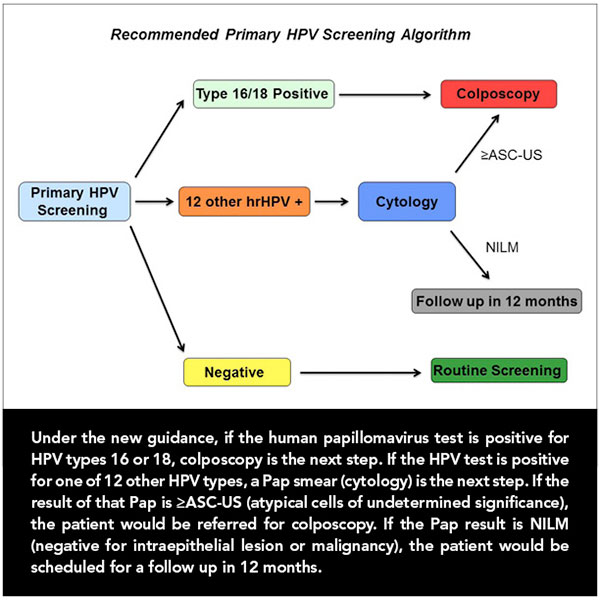

In [1]:
from IPython.display import Image
Image('Desktop/Python/HPV_graphic_large.jpg')


**Image 1. Recommended Primary HPV Screening Algorithm.** 

Image Source: (https://www.uab.edu/news/health/item/5625-new-recommendation-for-cervical-cancer-screening-using-hpv-test-alone)

In [2]:
#Import libraries  
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Supress unnecessary warnings to save notebook space
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import the Data
cervical = pd.read_csv("Desktop/Python/Machine_Learning/risk_factors_cervical_cancer .csv")

print("This dataset consists of",len(cervical),"rows with the following columns:" "\n")

cervical.info()

This dataset consists of 858 rows with the following columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylo

# Feature Analysis 

## 2. Data Description

The dataset used in this project, "risk_factors_cervical_cancer.csv" was obtained from the open access UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29). The dataset contains data from patient records from'Hospital Universitario de Caracas' in Caracas, Venezuela.

The data is gathered from a single csv filed (entitled above) and contains 36 variables (also known as features) that may serve as putative risk factors in predicting the onset of cervical cancer. Each of these features are briefly described below and classified as either a continuous or a cateogrical variables. The categorical variables in this dataset are binary and  have a value of either 0 or 1. Categorical variables with the value '0' indicates the absence or lowest risk of a factor or disease, while '1' indicates the presence or highest risk of a factor or disease.

Aside from continuous and categorical values there are some data points that are missing from the dataseet. They are denoted at the ouset with a '?' symbol.

- Age: Age of the patients (continous variable).                                   
- Number of sexual partners: Number of sexual partners patient has had (continous variable).  
- First sexual intercourse: Age at first sexual intercourse (continous variable).             
- Num of pregnancies: Number of pregnancies a patient has had (continous variable).                  
- Smokes: If a patient is a smoker (categorical variable).                             
- Smokes (years): Number of years a patient has smoked, if they have smoked (categorical variable).                   
- Smokes (packs/year): How many packs of cigarettes a patient estimates they smoke per year (continous variable).            
- Hormonal Contraceptives: If patient is using hormonal contraceptives (categorical variable).               
- Hormonal Contraceptives (years): Number of years a patient has been using hormonal contraceptives (continous variable).        
- IUD: If the patient has an IUD (categorical variable).                                  
- IUD (years): Number of years a patient has been using an IUD (continous variable).                        
- STDs: If the patient has been diagnosed with an STD (categorical variable).                               
- STDs (number): Number of STDs a patient has been diagnosed with (categorical variable).                        
- STDs:condylomatosis : Diagnosis of condylomatosis- a wart like growth caused by HPV (categorical variable).         
- STDs:cervical condylomatosis : Diagnosis of condylomatosis in the cervix (categorical variable).         
- STDs:vaginal condylomatosis :  Diagnosis of condylomatosis in the vagina(categorical variable).        
- STDs:vulvo-perineal condylomatosis : Diagnosis of condylomatosis in the vulva perineum (categorical variable).
- STDs:syphilis : Diagnosis of syphhilis (categorical variable).                        
- STDs:pelvic inflammatory disease: Diagnosis of pelvic inflammatory disease (categorical variable).     
- STDs:genital herpes: Diagnosis of genital herpes (categorical variable).                  
- STDs:molluscum contagiosum: Diagnosis of molluscum (categorical variable).            
- STDs:AIDS: Diagnosis of AIDs (categorical variable).                             
- STDs:HIV: Diagnosis of HIV (categorical variable).                             
- STDs:Hepatitis B: Diagnosis of Hepatitis B (categorical variable).                     
- STDs:HPV : Diagnosis of Human Papilloma Virus known as a strong risk factor for cervical cancer (categorical variable).                             
- STDs: Number of diagnosis: Number of STDS diagnosed (continous variable).             
- STDs: Time since first diagnosis: Number of years since first STD diagnosis (continous variable).     
- STDs: Time since last diagnosis:   Number of years since last STD diagnosis (continous variable)    
- Dx: Is an abbreviation for diagnosis. The following features are diagnoses:
    - Dx:Cancer is a diagnosis of a non-cervical cancer.
    - Dx:CIN is the presence abnormal cells found on the surface of the         the cervix. CIN is usually caused by human papillomavirus (HPV) and       is found when a cervical biopsy is done.
    - Dx:HPV is the presence of HPV. HPV is a known factor increased
      risk of cervical cancer.
    - Dx is a diagnosis of cervical cancer. 
- Hinselmann: Screening test for cervical cancer (categorical variable).                          
- Schiller: Screening test for cervical cancer (categorical variable).                              
- Citology: Screening test for cervical cancer (categorical variable).                             
- Biopsy:  Test for cervical cancer. Biopsises are confirmatory (categorical variable).



**Relevant Papers:**

Kelwin Fernandes, Jaime S. Cardoso, and Jessica Fernandes. 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening.' Iberian Conference on Pattern Recognition and Image Analysis. Springer International Publishing, 2017.



In [4]:
cervical.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [7]:
cervical.head(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


In [8]:
cervical.tail(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
838,35,3.0,18.0,3.0,0.0,0.0,0.0,1.0,5.0,0.0,...,?,?,0,0,0,0,0,0,0,0
839,31,3.0,19.0,1.0,0.0,0.0,0.0,1.0,0.08,1.0,...,?,?,1,0,0,1,0,0,0,0
840,24,2.0,16.0,3.0,0.0,0.0,0.0,1.0,5.0,0.0,...,?,?,0,0,0,0,0,0,0,0
841,23,2.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
842,36,3.0,16.0,3.0,1.0,6.0,0.3,1.0,2.0,0.0,...,?,?,0,0,0,0,0,0,0,0
843,30,3.0,14.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,...,?,?,0,0,0,0,0,0,0,0
844,26,8.0,15.0,1.0,1.0,9.0,1.35,1.0,5.0,1.0,...,?,?,0,0,0,0,0,0,0,0
845,19,2.0,15.0,2.0,0.0,0.0,0.0,1.0,0.75,0.0,...,?,?,0,0,0,0,0,0,0,0
846,35,2.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
847,30,3.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [16]:
cervical.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


As we can see with cervical.head() there's several "?" values in the dataset. We were unable to count these with our "cervical.isnull().sum()" command because "?" is not recognized as the NaN value which usually denotes missing values. Without any additional information, I will assume these would regulary be defined as NaN values in Pandas. I will replace section 3. Data Cleaning/ 4. Exploratory Data Analysis section of this project.

In [17]:
cervical['First sexual intercourse']

0      15.0
1      14.0
2         ?
3      16.0
4      21.0
       ... 
853    18.0
854    19.0
855    17.0
856    24.0
857    20.0
Name: First sexual intercourse, Length: 858, dtype: object

In [18]:
cervical = cervical.replace('?', np.nan)

cervical.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [21]:
#Determine how many values are missing from each variable in the dataset.
cervical.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

## Observations

## 3. Data Cleaning

Many columns have object dtypes and not integers. Will convert all columns into integer data type and to generate summary statistics to develop a hypothesis about which target variable(s) we shall use for our analysis and which variables we think (a priori) correlate withh our target variable(s).

Evaluating the variables and cervical.isna() parameters above, here are some observations:

**Variables with potential colinearity:**
- Hormonal contraceptives, Hormonal contraceptive (years), IUD, IUD(years), Num of pregnancies.
- All variables in the "Smokes" category.
- All variables in the "STDs" category.
- Dx:HPV, STDs: genital herpes, condylomatosis, cervical condylomatosis, vaginal condylomatosis, vulvo-perineal condylomatosis, HPV, Dx:CIN.
- First sexual intercourse has only 7 missing values, should impute values here or completely remove since it's only 7 of 857.
- All screening tests.
- Num of pregnancies and Num of sexual encouters.

**Imputation and Data Removal**
- First sexual intercourse has only 7 missing values, should impute values here since it's only 7 of 858.
- Smokes only has 13 missing values, I should impute since its only 13 of 858 missing.
- Number of sexual partners is only 26 missing values, will be imputed.
- Consider making have been 'Pregnant'-if a patient has been pregnant or not-- as a categorical variable. This may be an unexplored risk factor for HPV.
- STDs: 'Time since first diagnosis' and STDs: 'Time since last diagnosis' have NaN values in over 90% of the data set. These columns will be removed.
- For colinearity, recursive feature elimination with cross-validation should provide cues to how linear the variables are. If the variable are colinear, then they should hold the same feature ranking or similar feature rankings after cross-validation.
- Every column containing "STDS:" aside from the aforementioned are missing the same #of values. These values belong to the same patients. In light of these missing values, there are three options worth considering for analysis: **(1) impute the median values for each column into these rows, (2) remove the rows containing NaN values and (3) perform both operations.**

**Note**: Data cleaning will also occur in sections **4. Exploratory Data Analysis (EDA)** and **5. Models and model training, main analysis**. This will be necessary as I use recursive feature elimination and recursive feature elimination with cross-validation to determine which features should be removed from the dataset. Moreover, imputation and removal of points should not occur until the data have been split into testing and training sets.



In [22]:
#Convert the dtypes to integers or floats
cervical = cervical.apply(pd.to_numeric)
cervical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

In [48]:
#Summary statistics of non-putative target features
risk_factors = cervical[['Age','Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']]
risk_factors.describe(include = 'all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),STDs: Time since first diagnosis,STDs: Time since last diagnosis
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,71.000000,71.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,6.140845,5.816901
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,5.895024,5.755271
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,4.000000,3.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,8.000000,7.500000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,22.000000,22.000000


As seen above in the summary statistics, the standard deviation of most features is high. As such, I will consider scaling the data prior to analysis. For ANN analysis, I will range scale the data.

## Selecting a Target Feature

A target feature to conduct our analysis will be one of the following features: Dx:Cancer, Dx:CIN, Dx:HPV, Dx, Hinselmann, Schiller, Citology, and Biopsy. Ideally, we should rely on "Dx" as our target feature, but this will heavily be dependent upon class balance. 

**Note: Other variables could be considered as target variables but this would not have a known biomedical basis.** This would be interesting to test in another project

- Below we shall explore how these categorical features are distributed throughout the dataset. We will then select a feature as our target feature for our classification analysis.

- The class balances for each hof these features will graphed below.



There are: 24 patients diagnosed with cervical cancer out a total of 858 patients.


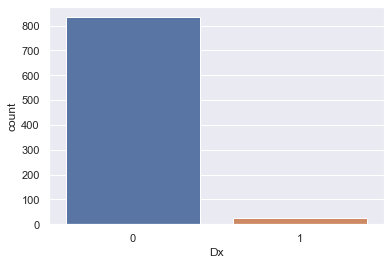

In [49]:
Dx = []
for x in cervical['Dx']:
    if x == 1:
        Dx.append(x)
print("There are:", len(Dx), "patients diagnosed with cervical cancer out a total of 858 patients.")
sns.countplot(cervical['Dx'], label = "Count")

In [50]:
cervical.groupby('Dx').median()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy
Dx,,,,,,,,,,,,,,,,,,,,,
0,25,2.0,17.0,2.0,0.0,0.0,0.0,1.0,0.5,0.0,...,0,4.0,3.0,0,0,0,0,0,0,0
1,30,2.5,18.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,15.5,15.5,1,0,1,0,0,0,0


There are: 18 patients diagnosed with HPV out a total of 858 patients.


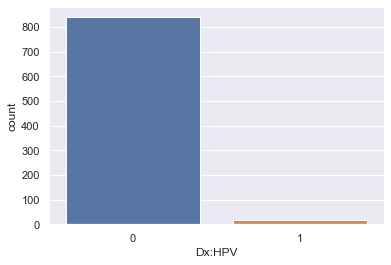

In [51]:
Dx_HPV = []
for x in cervical['Dx:HPV']:
    if x == 1:
        Dx_HPV.append(x)
print("There are:", len(Dx_HPV), "patients diagnosed with HPV out a total of 858 patients.")
sns.countplot(cervical['Dx:HPV'], label = "Count")

In [52]:
cervical.groupby('Dx:HPV').median()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology,Biopsy
Dx:HPV,,,,,,,,,,,,,,,,,,,,,
0,25,2.0,17.0,2.0,0.0,0.0,0.0,1.0,0.5,0.0,...,0,4.0,3.0,0,0,0,0,0,0,0
1,32,2.5,18.0,2.5,0.0,0.0,0.0,1.0,1.0,0.0,...,0,16.0,16.0,1,0,1,0,0,0,0


There are: 18 patients diagnosed a non-cervical cancer out a total of 858 patients.


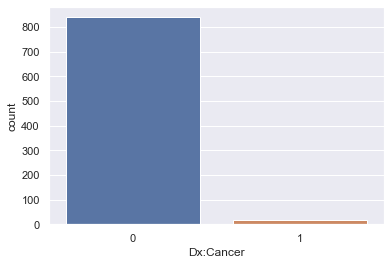

In [53]:
Dx_cancer = []
for x in cervical['Dx:Cancer']:
    if x == 1:
        Dx_cancer.append(x)
print("There are:", len(Dx_cancer), "patients diagnosed a non-cervical cancer out a total of 858 patients.")
sns.countplot(cervical['Dx:Cancer'], label = "Count")

In [54]:
cervical.groupby('Dx:Cancer').median()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Dx:Cancer,,,,,,,,,,,,,,,,,,,,,
0,25.0,2.0,17.0,2.0,0.0,0.0,0.0,1.0,0.5,0.0,...,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31.5,3.0,18.5,2.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,16.0,16.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


There are: 9 patients diagnosed with CIN out a total of 858 patients.


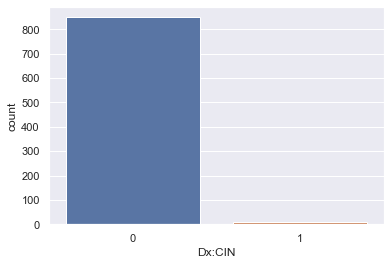

In [55]:
Dx_CIN = []
for x in cervical['Dx:CIN']:
    if x == 1:
        Dx_CIN.append(x)
print("There are:", len(Dx_CIN), "patients diagnosed with CIN out a total of 858 patients.")
sns.countplot(cervical['Dx:CIN'], label = "Count")

In [56]:
cervical.groupby('Dx:CIN').median()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Dx:CIN,,,,,,,,,,,,,,,,,,,,,
0,25,2.0,17.0,2.0,0.0,0.0,0.0,1.0,0.5,0.0,...,0,4.0,3.0,0,0,0,0,0,0,0
1,26,2.0,17.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0,15.0,15.0,0,0,1,0,0,0,0


There are: 35 patients diagnosed with cervical cancer by Hinselmann screening out a total of 858 patients.


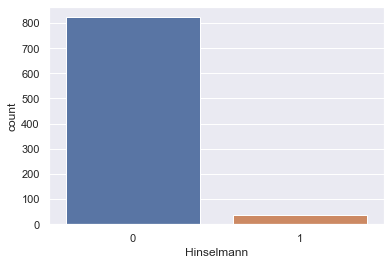

In [57]:
Hinselmann = []
for x in cervical['Hinselmann']:
    if x == 1:
        Hinselmann.append(x)
print("There are:", len(Hinselmann), "patients diagnosed with cervical cancer by Hinselmann screening out a total of 858 patients.")
sns.countplot(cervical['Hinselmann'], label = "Count")

In [58]:
cervical.groupby('Hinselmann').median()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Schiller,Citology,Biopsy
Hinselmann,,,,,,,,,,,,,,,,,,,,,
0,25,2.0,17.0,2.0,0.0,0.0,0.0,1.0,0.5,0.0,...,0,4.0,3.5,0,0,0,0,0,0,0
1,26,2.0,17.0,2.0,0.0,0.0,0.0,1.0,0.5,0.0,...,0,3.0,3.0,0,0,0,0,1,0,1


There are: 74 patients diagnosed with cervical cancer by Hinselmann screening out a total of 858 patients.


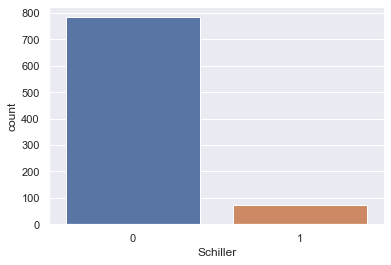

In [59]:
Schiller = []
for x in cervical['Schiller']:
    if x == 1:
        Schiller.append(x)
print("There are:", len(Schiller), "patients diagnosed with cervical cancer by Hinselmann screening out a total of 858 patients.")
sns.countplot(cervical['Schiller'], label = "Count")

In [60]:
cervical.groupby('Schiller').median()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Citology,Biopsy
Schiller,,,,,,,,,,,,,,,,,,,,,
0,25,2.0,17.0,2.0,0.0,0.0,0.0,1.0,0.5,0.0,...,0,4.0,3.0,0,0,0,0,0,0,0
1,28,2.0,17.0,2.0,0.0,0.0,0.0,1.0,0.5,0.0,...,0,4.0,4.0,0,0,0,0,0,0,1


There are: 44 patients diagnosed with cervical cancer by Cytological screening out a total of 858 patients.


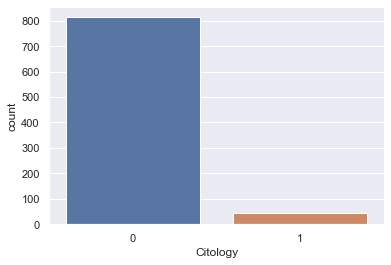

In [61]:
Citology = []
for x in cervical['Citology']:
    if x == 1:
        Citology.append(x)
print("There are:", len(Citology), "patients diagnosed with cervical cancer by Cytological screening out a total of 858 patients.")
sns.countplot(cervical['Citology'], label = "Count")

In [62]:
cervical.groupby('Citology').median()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Biopsy
Citology,,,,,,,,,,,,,,,,,,,,,
0,25,2.0,17.0,2.0,0.0,0.0,0.0,1.0,0.50,0.0,...,0,3.5,3.0,0,0,0,0,0,0,0
1,25,2.5,17.0,2.0,0.0,0.0,0.0,1.0,0.25,0.0,...,0,4.0,4.0,0,0,0,0,0,1,0


There are: 55 patients diagnosed with cervical cancer by Biopsy screening out a total of 858 patients.


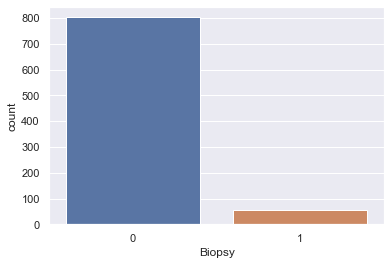

In [63]:
Biopsy = []
for x in cervical['Biopsy']:
    if x == 1:
        Biopsy.append(x)
print("There are:", len(Biopsy), "patients diagnosed with cervical cancer by Biopsy screening out a total of 858 patients.")
sns.countplot(cervical['Biopsy'], label = "Count")

Based on the above results: It appears that Schiller or biopsy would be best as a target feature given the heavy class imbalances in the data. Moreover, 'Biopsy' serves as the final confirmatory diagnostic test of the above tests. 

I will make a correlation plot below and see if any other patterns can be gleaned.

In [64]:
median = cervical.groupby('Biopsy').median()
median

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
Biopsy,,,,,,,,,,,,,,,,,,,,,
0,25,2.0,17.0,2.0,0.0,0.0,0.0,1.0,0.5,0.0,...,0,4.0,3.5,0,0,0,0,0,0,0
1,28,2.0,17.0,2.5,0.0,0.0,0.0,1.0,0.5,0.0,...,0,3.0,3.0,0,0,0,0,0,1,0


In [65]:
med_diff = median.diff()

#Show the difference between the median for those who received a biopsy and those who didn't 
med_diff.iloc[[1]]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
Biopsy,,,,,,,,,,,,,,,,,,,,,
1,3.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,-0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0


There are a minimal differences between the medians of our target feature. Of note, a positive Schiller test is the only screening tool that is categorical variable to change between our non-biopsied and biopsied patients. Given this, I hypothesize that the Schiller test will be a feature of high importance that correlates with biopsy. This will be confirmed downstream with recursive feature elimination.


In [66]:
mean = cervical.groupby('Biopsy').mean()
mean

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
Biopsy,,,,,,,,,,,,,,,,,,,,,
0,26.696139,2.528278,16.989950,2.258621,0.142857,1.153474,0.438677,0.640288,2.172409,0.107402,...,0.079701,6.316667,5.933333,0.014944,0.007472,0.014944,0.021171,0.012453,0.032379,0.032379
1,28.636364,2.518519,17.072727,2.541667,0.185185,2.190129,0.665059,0.654545,3.318000,0.173077,...,0.200000,5.181818,5.181818,0.109091,0.054545,0.109091,0.127273,0.454545,0.872727,0.327273


In [67]:
mean_diff = mean.diff()

#Show the difference between the means for those who received a biopsy and those who didn't 
mean_diff.iloc[[1]]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
Biopsy,,,,,,,,,,,,,,,,,,,,,
1,1.940224,-0.009759,0.082778,0.283046,0.042328,1.036656,0.226382,0.014258,1.145591,0.065675,...,0.120299,-1.134848,-0.751515,0.094147,0.047073,0.094147,0.106102,0.442092,0.840349,0.294894


The mean difference shows what may be meaningful results for predicting which features will be most important in predicting if a patient underwent biopsy. Of note, again, Schiller shows a higher difference than other categorical features, lending weight to our previous hypothesis. Following this logic, I would expect the categorical features to be ranked accordingly:

Schiller:                               1

Hinselmann:                             2

Citology:                               3

Dx:                                     4

Dx:Cancer:                              5 (tie)

Dx:HPV:                                 5 (tie)

Dx:CIN:                                 7 


Text(0.5, 1.05, 'Correlation of Risk Factors')

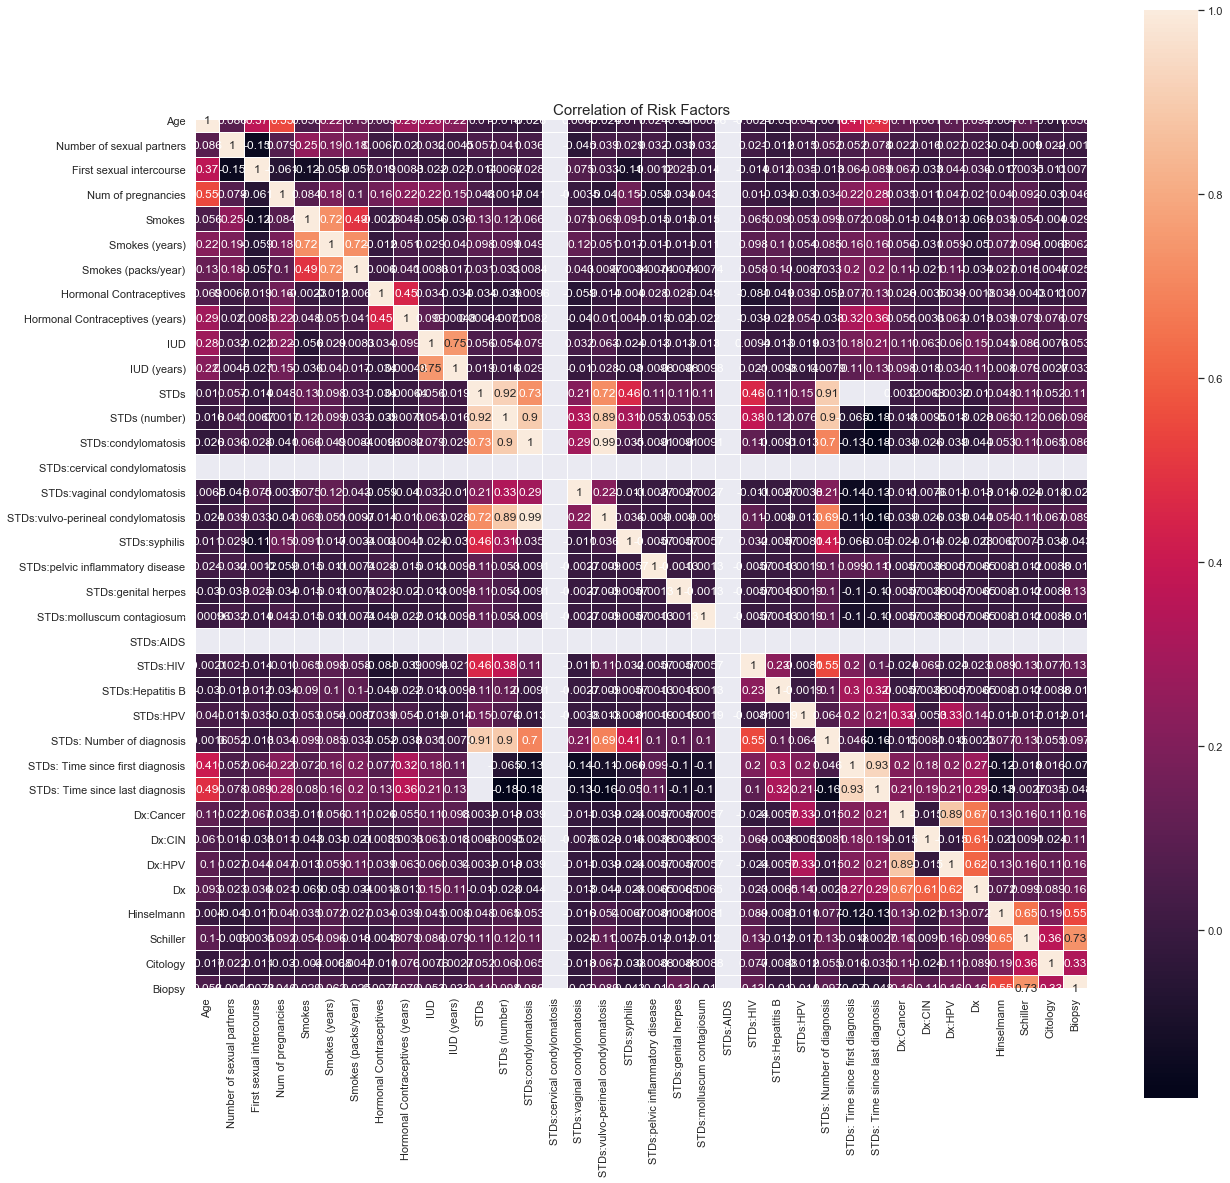

In [68]:
corr = cervical.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True ,annot_kws={'size': 12}, linewidths=0.1, linecolor='white')
plt.title('Correlation of Risk Factors', y=1.05, size=15) 

The correlation plot reveals a high correlation between many of the variables we suspected to be colinear (see above for full explanation) such as variables of the same category. As predicted above the Schiller test shows the highest correlation of all screening tests with a biopsy. As such, **I will select Biopsy as my targe variable for binary classifcation in my logistic regression and artifical neural network models.**

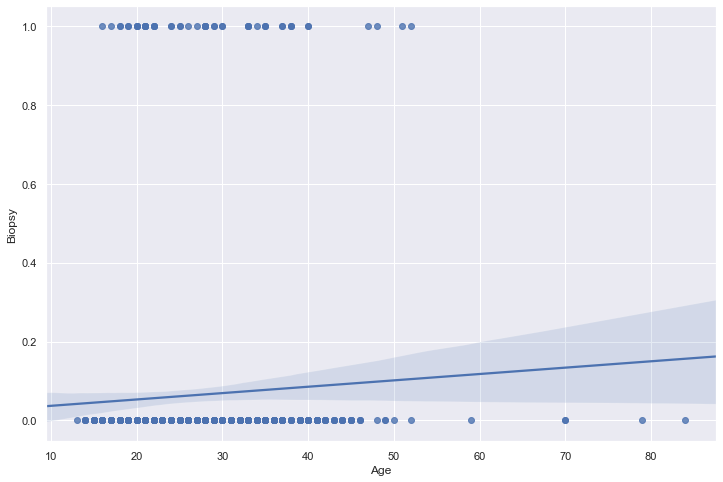

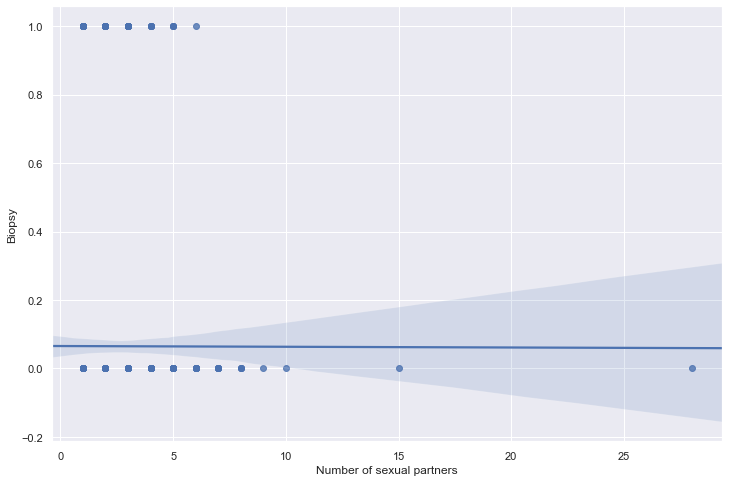

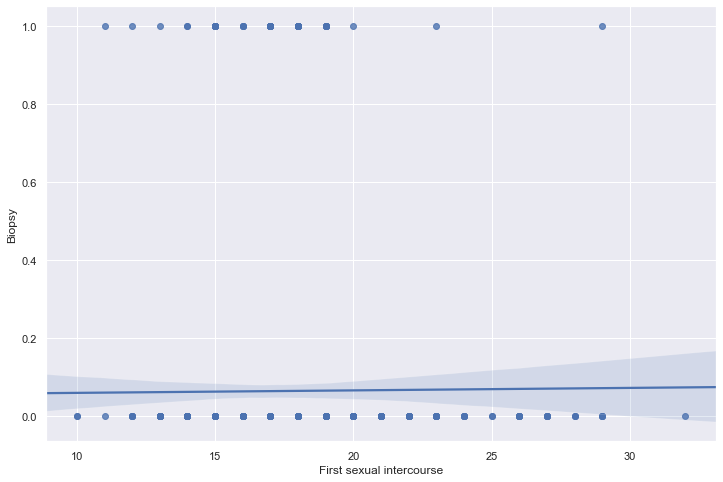

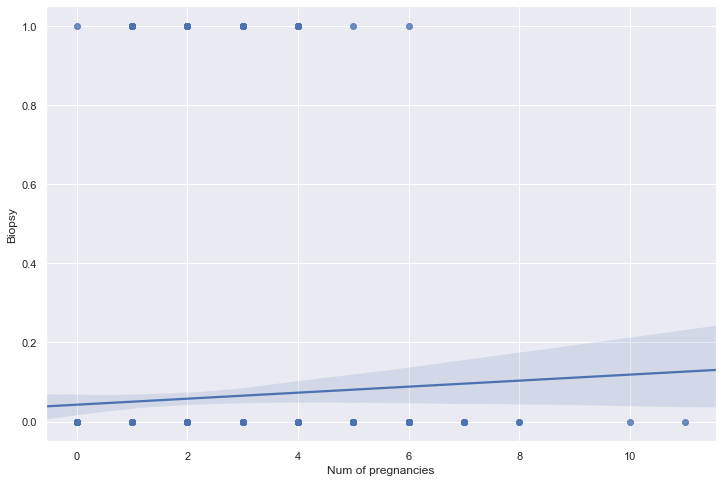

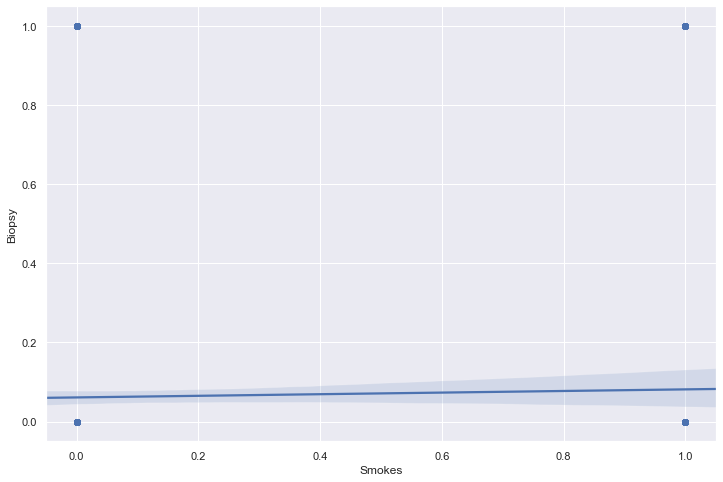

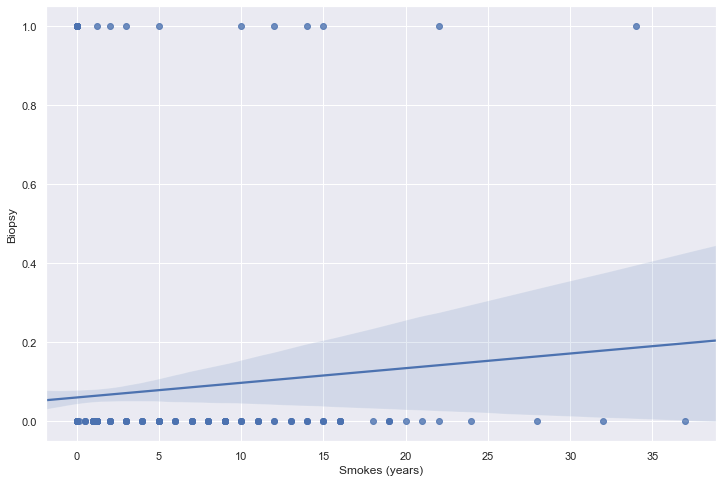

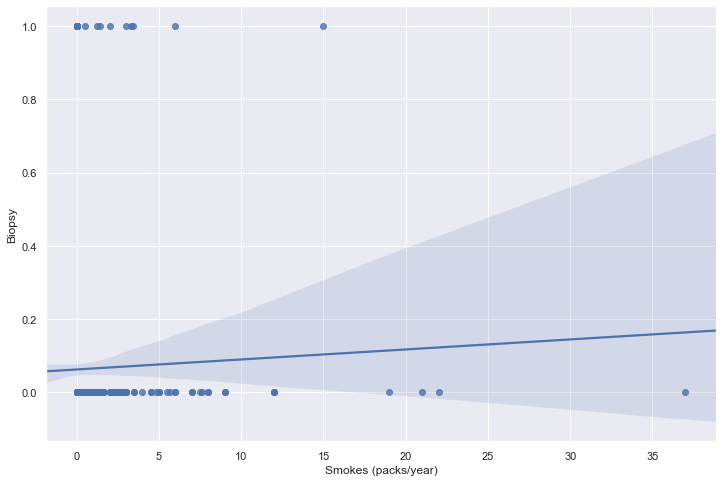

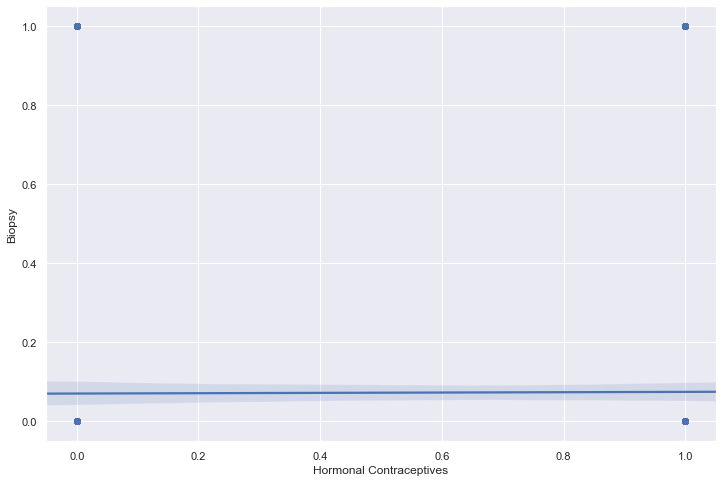

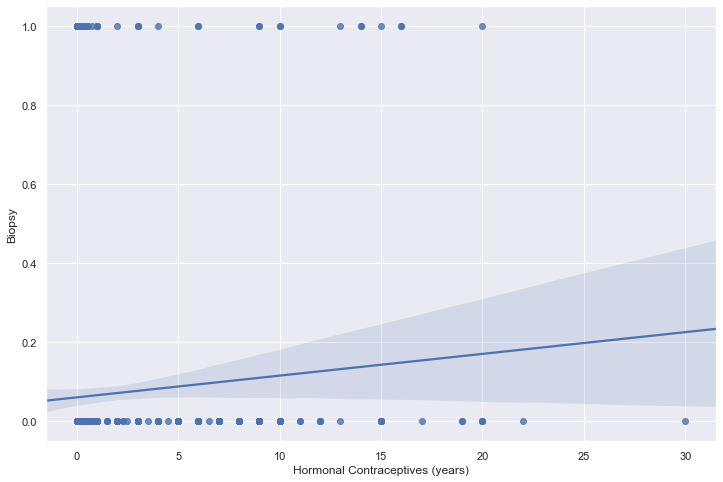

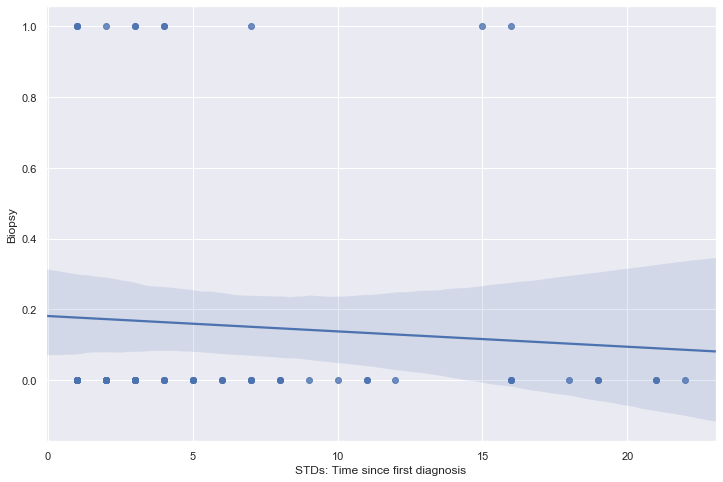

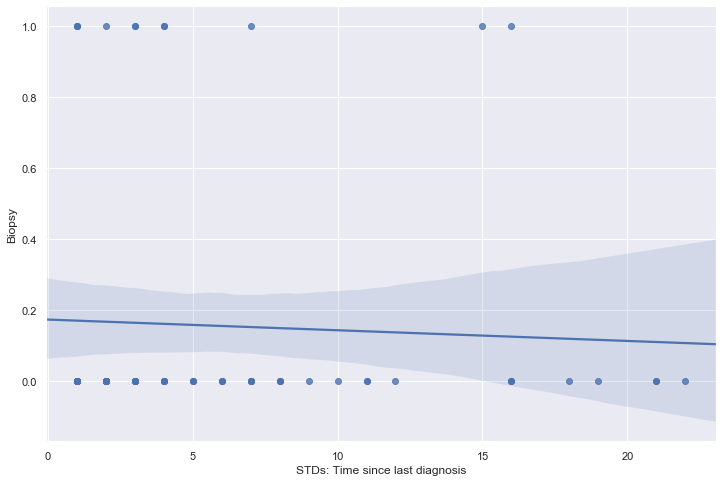

In [97]:
from scipy import stats
def r_squared(x, y):
    return stats.pearsonr(x, y)[0] ** 2

#Plot a linear regression model for biopsy and each variable
for variable in risk_factors.columns:
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.regplot(x = variable, y = "Biopsy", data = cervical)


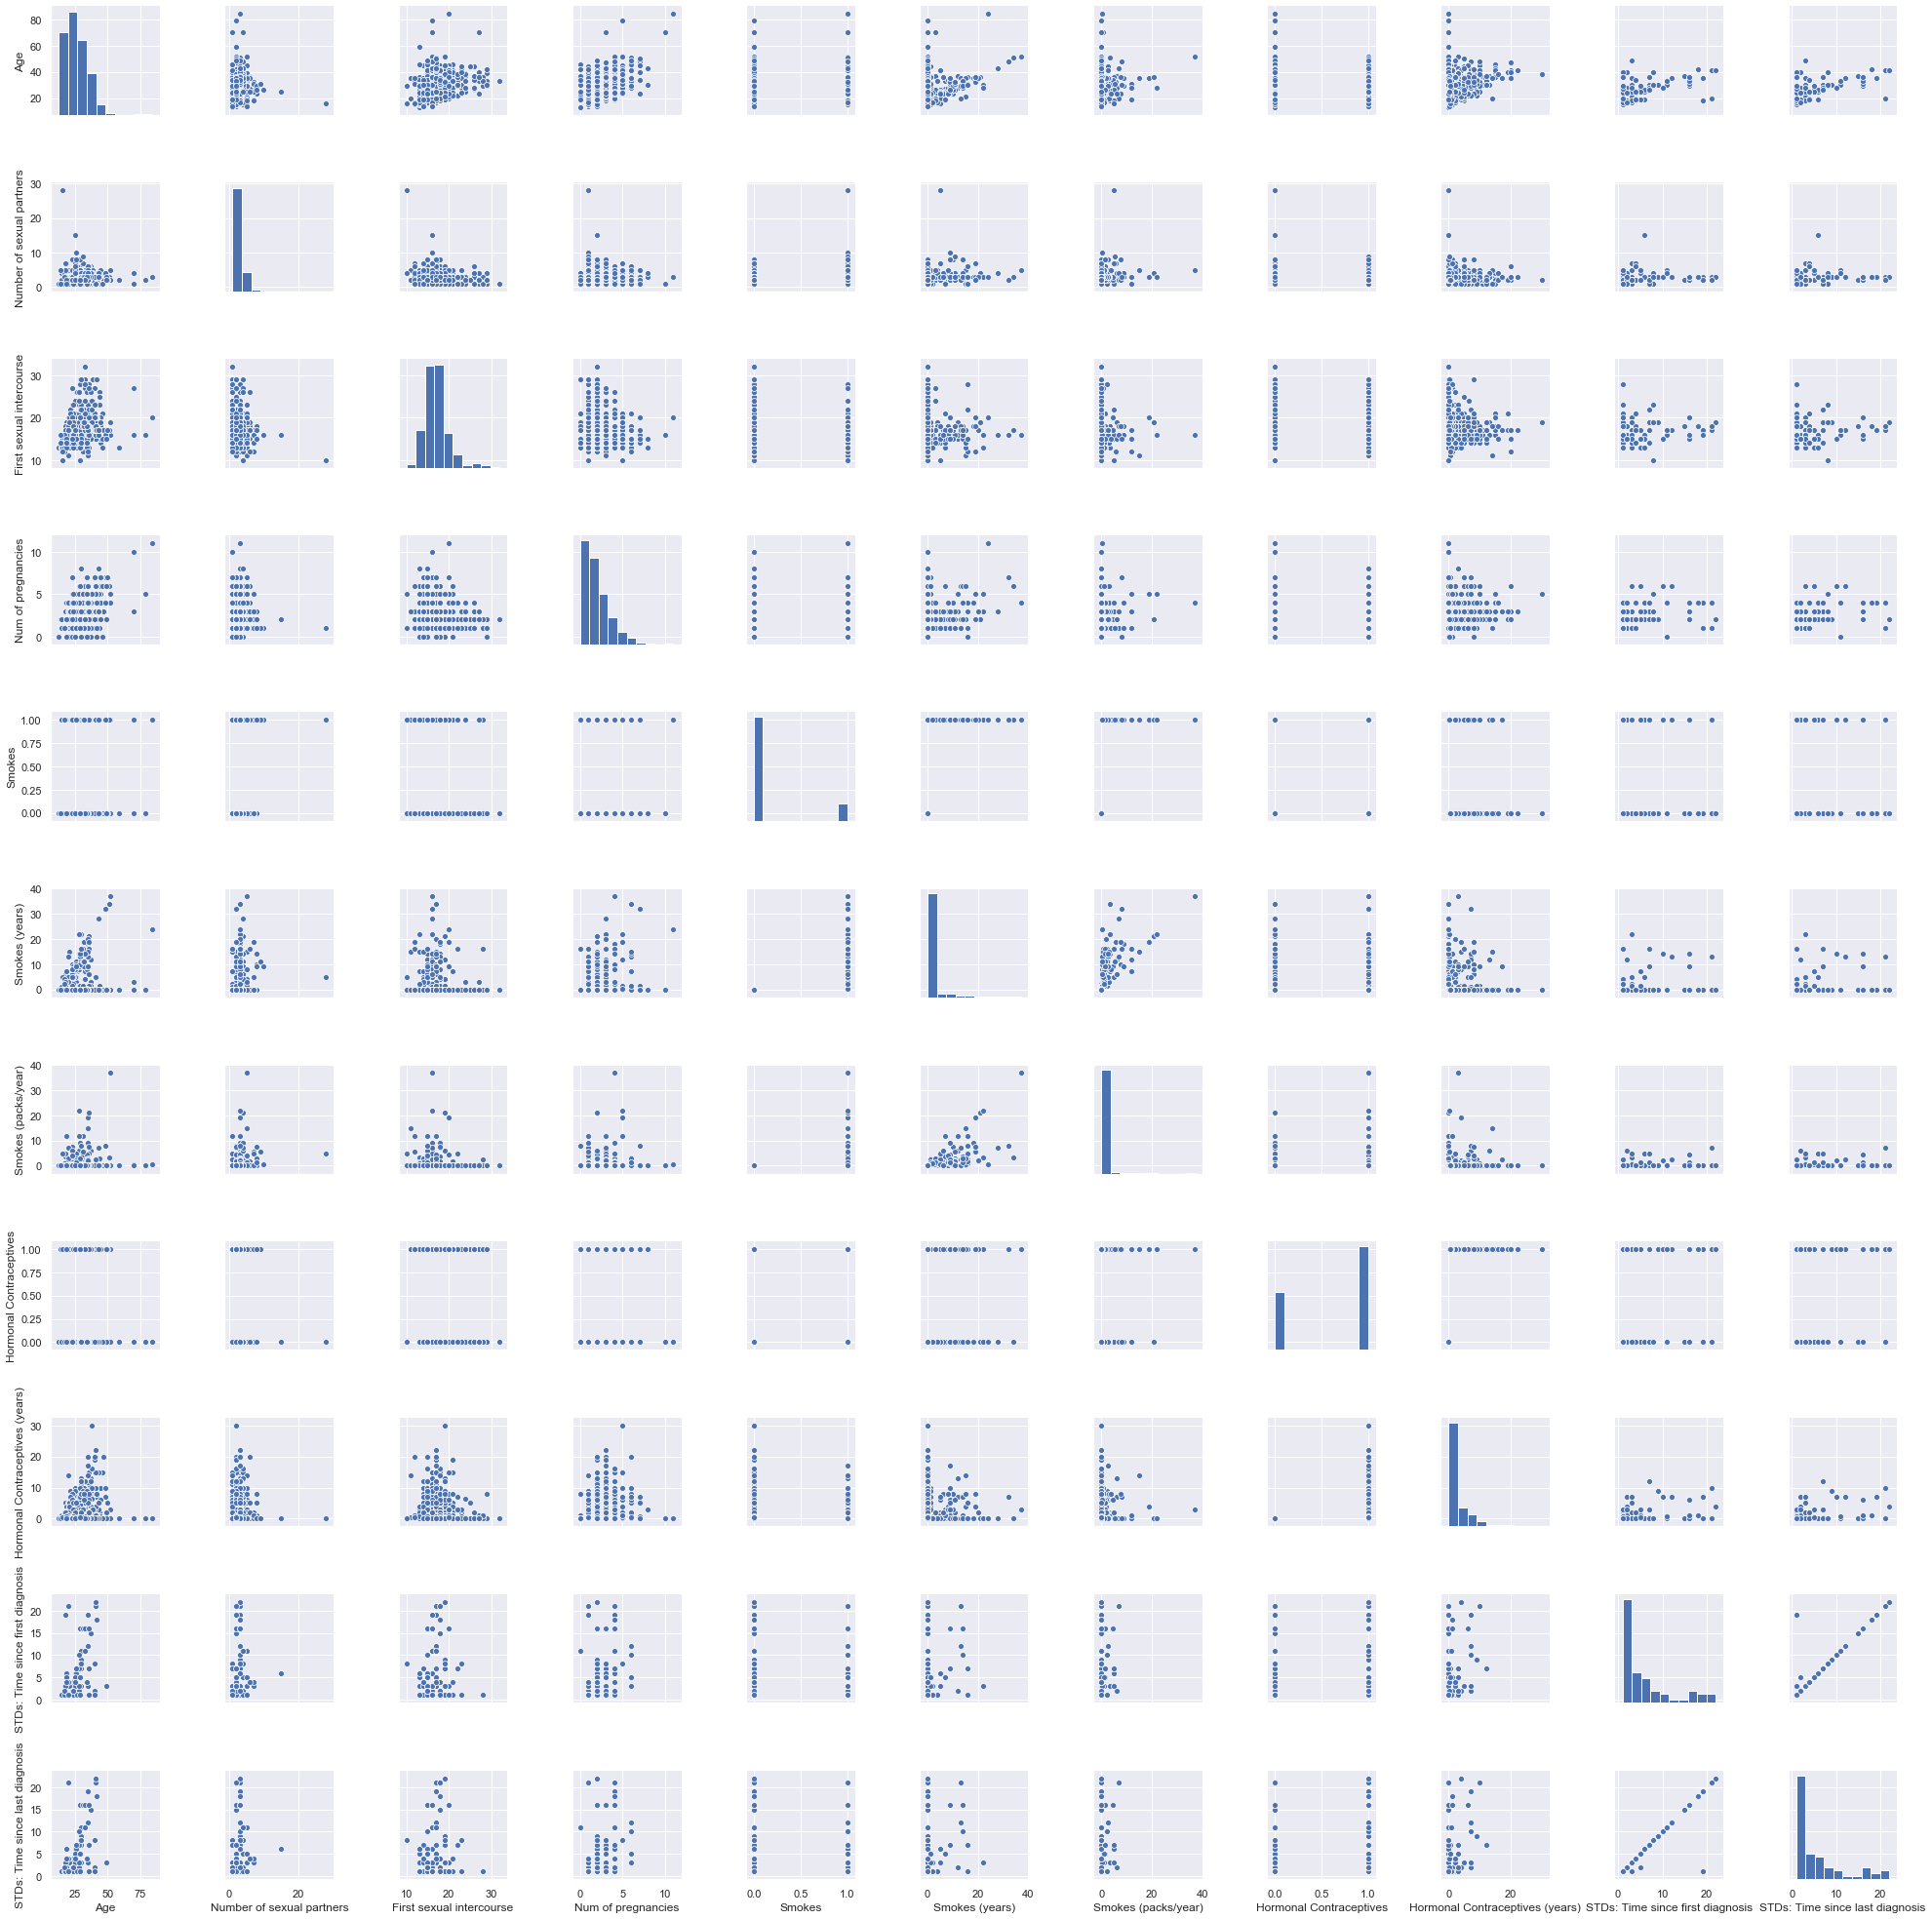

In [100]:
#Plot pairwise relationships in the dataset. This will provide final cues to which features interact with one another.
sns.pairplot(risk_factors)

## 4. Exploratory Data Analysis (EDA)

**Note**: Data cleaning will also occur in sections **3. Exploratory Data Analysis (EDA)** and **5. Models and model training, main analysis**.As seen above, I have begun to visualize the data, make hypotheses and conclusions.  This will be continually necessary as I use recursive feature elimination and recursive feature elimination with cross-validation to determine which features should be removed from the dataset. 

# Logistic Regression with Recursive Feature Elimination

In [101]:
#Import libraries for Logistic Regression and Recursive Feature Elimination
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


In [103]:
#Drop our target variabe and variables missing over 50% of values.

X = cervical.drop(['Biopsy', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis = 1)

y = cervical['Biopsy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Data Imputation and Scaling

- First we will impute the median values in place of the NaN values for each feature.
- For accurate prediction, we will have to impute the median values separately for the training and test data sets.
- Next we will range scale the features due to the high standard deviation found in the summary statistics. For more information on scaling features to range, visit section 6.3.1.1. "Scaling features to a range": (https://scikit-learn.org/stable/modules/preprocessing.html).

In [104]:
#Replace NaN values with the median
X_train = X_train.fillna(X_train.median(axis = 0))
X_test = X_test.fillna(X_train.median(axis = 0))

#Sanity check
X_train.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [105]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train[X_train.columns] = min_max_scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = min_max_scaler.fit_transform(X_test[X_test.columns])

#Sanity check
X_train.head(30)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
7,0.184615,0.000000,0.727273,0.3,0.0,0.000000,0.000000,1.0,0.066667,1.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,0.200000,0.037037,0.318182,0.4,0.0,0.000000,0.000000,1.0,0.066667,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,0.215385,0.111111,0.272727,0.2,1.0,0.297297,0.074324,1.0,0.200000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319,0.138462,0.000000,0.409091,0.2,0.0,0.000000,0.000000,1.0,0.016667,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,0.246154,0.148148,0.272727,0.4,0.0,0.000000,0.000000,0.0,0.000000,1.0,...,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0
368,0.092308,0.037037,0.272727,0.1,0.0,0.000000,0.000000,1.0,0.100000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
779,0.307692,0.000000,0.227273,0.4,0.0,0.000000,0.000000,1.0,0.300000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
682,0.861538,0.000000,0.272727,1.0,0.0,0.000000,0.000000,0.0,0.000000,1.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
483,0.092308,0.074074,0.272727,0.4,0.0,0.000000,0.000000,1.0,0.100000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.307692,0.000000,0.318182,0.1,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are: 44 or 6.41 % patients diagnosed with cervical cancer by Biopsy screening out a total of 686 patients.


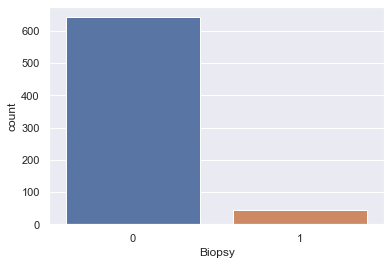

In [106]:
imbalance = []
for x in y_train:
    if x == 1:
        imbalance.append(x)
        
print("There are:", len(imbalance), "or", round((len(imbalance)/len(y_train)*100),2), "%", "patients diagnosed with cervical cancer by Biopsy screening out a total of", len(y_train), "patients.")
sns.countplot(y_train, label = "Count")


There are: 11 or 6.4 % patients diagnosed with cervical cancer by Biopsy screening out a total of 172 patients.


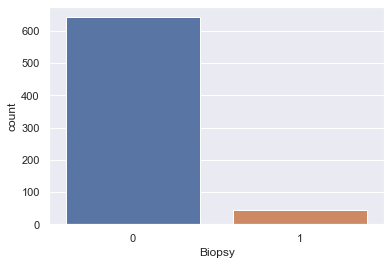

In [107]:
imbalance = []
for x in y_test:
    if x == 1:
        imbalance.append(x)
        
print("There are:", len(imbalance), "or", round((len(imbalance)/len(y_test)*100),2), "%", "patients diagnosed with cervical cancer by Biopsy screening out a total of", len(y_test), "patients.")
sns.countplot(y_train, label = "Count")


There are significant class imbalances (1:15) non-biopsied to biopsied patients in our training and test sets. This will skew our model significantly. I will perform the analysis, assess the model for, accuracy, balanced accuracy, recall, precison, F1, ROC-AUC scores. Given the class imbalance, our model should have high accuracy and should be able to predict if someone if cancer free well, but have poor performance when determining if someone has cancer.

## 5. Models and model training, main analysis 



In [108]:
estimator = LogisticRegression() #Logistic Regression model for recursive feature elimination
rfe = RFE(estimator, 1, step = 1) #Select 1 feature at a time to assess the ranking of each variable of importance
rfe = rfe.fit(X_train, y_train)
rfe_ranking = rfe.ranking_
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by = 'Ranking')

,Feature,Ranking
31,Schiller,1
29,Dx,2
27,Dx:CIN,3
19,STDs:genital herpes,4
32,Citology,5
3,Num of pregnancies,6
30,Hinselmann,7
2,First sexual intercourse,8
17,STDs:syphilis,9
11,STDs,10


**Voila!** As expected, Schiller screening and other screening tests have a feature importance in predicting if someone received a biopsy. Interestingly, STDs:genital herpes is the 4th ranked feature of importance. Since genital herpes is a result of HPV and HPV is a known strong risk factor for cervical cancer, then these ranking are somewhat on the right track despite the class imbalance.

In [109]:
#Import metrics to assess our model from sklearn
from sklearn.metrics import log_loss, accuracy_score, balanced_accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc, confusion_matrix


ce = log_loss(y_test,rfe.predict(X_test)) #Cross entropy function for multi-classification problem will test its accuracy on our binary model.
ac = accuracy_score(y_test,rfe.predict(X_test))
rc = recall_score(y_test,rfe.predict(X_test))
pc = precision_score(y_test,rfe.predict(X_test))
f = f1_score(y_test,rfe.predict(X_test))
fpr, tpr, th = roc_curve( y_test,rfe.predict(X_test))
              
print('Cross-entropy loss is:', ce, "\n", 'Accuracy is:',ac,"\n",'Recall is:', rc, "\n",'Precision is:', pc, "\n",'F1 score is:', f, "\n",'AUC is', auc(fpr,tpr))

cm = confusion_matrix(y_test, rfe.predict(X_test), labels = [0, 1])
pd.DataFrame(cm)

Cross-entropy loss is: 1.6064872577982383 
 Accuracy is: 0.9534883720930233 
 Recall is: 0.9090909090909091 
 Precision is: 0.5882352941176471 
 F1 score is: 0.7142857142857143 
 AUC is 0.932806324110672


,0,1
0,154,7
1,1,10


## Metric Observations

- The cross-entropy function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) as detailed in the documentation is for multi-nomial classifacation and hence isn't suitable for our analysis. We glean this from it's high value as we'd expect it to between 0 and 1.
- Accuracy is high as expected. This is due to the class imbalance as the model is overfitting to non-biopsied patient data in a 15:1 ratio. 
-Precision and F1 are low due to class imbalance as predicted. 

To surmount the model overfitting, I will optimize the logistic regression model by tuning the class weight to balanced and then subsequently changing the penalty parameter. I will then assess the metrics in these models to see if there's an improvement in precision and F1 scores.

In [110]:
#Hyperparameter Optimization

estimator = LogisticRegression(class_weight = "balanced", solver = "liblinear") #should minimize overfitting to non-biopsied patients
rfe = RFE(estimator, 1, step = 1)
rfe = rfe.fit(X_train, y_train)
rfe_ranking = rfe.ranking_
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by = 'Ranking')


,Feature,Ranking
31,Schiller,1
27,Dx:CIN,2
19,STDs:genital herpes,3
32,Citology,4
2,First sexual intercourse,5
29,Dx,6
0,Age,7
17,STDs:syphilis,8
30,Hinselmann,9
10,IUD (years),10


In [111]:
ac = accuracy_score(y_test,rfe.predict(X_test))
bac = balanced_accuracy_score(y_test,rfe.predict(X_test))
rc = recall_score(y_test,rfe.predict(X_test))
pc = precision_score(y_test,rfe.predict(X_test))
f = f1_score(y_test,rfe.predict(X_test))
fpr, tpr, th = roc_curve( y_test,rfe.predict(X_test))
              
print('Accuracy is:',ac,"\n",'Balanced accuracy is:', bac,
"\n",'Recall is:', rc, "\n",'Precision is:', pc, "\n",'F1 score is:', f, "\n",'AUC is', auc(fpr,tpr))

cm = confusion_matrix(y_test, rfe.predict(X_test), labels = [0, 1])
pd.DataFrame(cm)

Accuracy is: 0.9534883720930233 
 Balanced accuracy is: 0.9328063241106719 
 Recall is: 0.9090909090909091 
 Precision is: 0.5882352941176471 
 F1 score is: 0.7142857142857143 
 AUC is 0.932806324110672


,0,1
0,154,7
1,1,10


In [112]:
#Hyperparameter Optimization

estimator = LogisticRegression(penalty = "l1", class_weight = "balanced", solver = "liblinear")
rfe = RFE(estimator, 1, step = 1)
rfe = rfe.fit(X_train, y_train)
rfe_ranking = rfe.ranking_
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by = 'Ranking')

,Feature,Ranking
31,Schiller,1
19,STDs:genital herpes,2
27,Dx:CIN,3
2,First sexual intercourse,4
32,Citology,5
29,Dx,6
9,IUD,7
30,Hinselmann,8
4,Smokes,9
7,Hormonal Contraceptives,10


In [113]:

ac = accuracy_score(y_test,rfe.predict(X_test))
bac = balanced_accuracy_score(y_test,rfe.predict(X_test))
rc = recall_score(y_test,rfe.predict(X_test))
pc = precision_score(y_test,rfe.predict(X_test))
f = f1_score(y_test,rfe.predict(X_test))
fpr, tpr, th = roc_curve( y_test,rfe.predict(X_test))
              
print('Accuracy is:',ac,"\n",'Balanced accuracy is:', bac,
"\n",'Recall is:', rc, "\n",'Precision is:', pc, "\n",'F1 score is:', f, "\n",'AUC is', auc(fpr,tpr))

cm = confusion_matrix(y_test, rfe.predict(X_test), labels = [0, 1])
pd.DataFrame(cm)

Accuracy is: 0.9534883720930233 
 Balanced accuracy is: 0.9328063241106719 
 Recall is: 0.9090909090909091 
 Precision is: 0.5882352941176471 
 F1 score is: 0.7142857142857143 
 AUC is 0.932806324110672


,0,1
0,154,7
1,1,10


**There are no major differences between tuning the solver method or the penalty for the LogisticRegression classifier. Therefore, we shall address class imbalance with by oversampling the minority class with packages from imbibelearn.**

- For more information see: (https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28). 

## Class Balance

In [127]:
from imblearn.combine import SMOTEENN

X = cervical.drop(['Biopsy', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis = 1)
y = cervical['Biopsy']
X = X.fillna(X.median(axis = 0)) #Must sample from original data 

res = SMOTEENN(random_state = 0)
X_res, y_res = res.fit_resample(X,y)

X_res = pd.DataFrame(X_res) #change array back to pd.DataFrame
y_res = pd.DataFrame(y_res)

X_res.columns = X.columns #reassign column names

#sanity check

X_res

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18.000000,4.000000,15.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,15.000000,1.000000,14.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,34.000000,1.000000,17.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,52.000000,5.000000,16.000000,4.000000,1.0,37.0,37.0,1.000000,3.000000,0.000000,...,0.0,0.0,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
4,42.000000,3.000000,23.000000,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,38.601934,1.466022,18.000000,1.466022,0.0,0.0,0.0,0.533978,0.133494,0.000000,...,0.0,0.0,1.00000,0.000000,0.466022,0.000000,0.466022,0.000000,1.0,0.533978
1397,38.557973,2.111595,15.055797,4.000000,0.0,0.0,0.0,1.000000,15.665216,0.055797,...,0.0,0.0,0.00000,0.944203,0.000000,0.944203,0.000000,0.000000,1.0,0.000000
1398,34.586440,2.603390,18.000000,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.39661,0.000000,0.396610,0.000000,0.396610,0.603390,1.0,0.603390
1399,21.106682,3.893318,15.000000,1.000000,0.0,0.0,0.0,0.106682,0.106682,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.106682,1.0,1.000000


In [133]:
#Concatenate X_res and y_res to create a Pd Dataframe to analyze
combined = pd.concat([X_res, y_res], axis=1, sort=False)

combined.rename(columns = {0:'Biopsy'}, inplace = True) 

#sanity check
combined



,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.000000,4.000000,15.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0
1,15.000000,1.000000,14.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0
2,34.000000,1.000000,17.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0
3,52.000000,5.000000,16.000000,4.000000,1.0,37.0,37.0,1.000000,3.000000,0.000000,...,0.0,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0
4,42.000000,3.000000,23.000000,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,38.601934,1.466022,18.000000,1.466022,0.0,0.0,0.0,0.533978,0.133494,0.000000,...,0.0,1.00000,0.000000,0.466022,0.000000,0.466022,0.000000,1.0,0.533978,1
1397,38.557973,2.111595,15.055797,4.000000,0.0,0.0,0.0,1.000000,15.665216,0.055797,...,0.0,0.00000,0.944203,0.000000,0.944203,0.000000,0.000000,1.0,0.000000,1
1398,34.586440,2.603390,18.000000,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.39661,0.000000,0.396610,0.000000,0.396610,0.603390,1.0,0.603390,1
1399,21.106682,3.893318,15.000000,1.000000,0.0,0.0,0.0,0.106682,0.106682,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.106682,1.0,1.000000,1


In [134]:
#Assess new summary statistics 

combined.describe(include = 'all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,...,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000
mean,26.970104,2.495374,16.838634,2.267949,0.143096,1.317709,0.466540,0.659710,2.383508,0.104628,...,0.000714,0.122746,0.082849,0.036035,0.082136,0.091034,0.256728,0.483173,0.200572,0.541042
std,8.234685,1.393498,2.119584,1.246215,0.332606,4.375010,2.036388,0.441725,4.257632,0.280742,...,0.026717,0.313972,0.237425,0.161611,0.236166,0.250914,0.387880,0.482844,0.345502,0.498491
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.845154,15.100252,1.000000,0.000000,0.000000,0.000000,0.033425,0.011313,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.101039,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320326,0.000000,1.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.540125,1.000000,0.278117,1.000000
max,84.000000,28.000000,29.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
#Assess new summary statistics for the mode
combined.groupby('Biopsy').median()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
Biopsy,,,,,,,,,,,,,,,,,,,,,
0,24.000000,2.000000,17.0,2.000000,0.0,0.0,0.0,1.000000,0.500000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,26.922764,2.516497,17.0,2.291401,0.0,0.0,0.0,0.957845,0.496914,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420464,1.0,0.152867


In [141]:
cervical2 = cervical.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'], axis = 1)
cervical2.groupby('Biopsy').median()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
Biopsy,,,,,,,,,,,,,,,,,,,,,
0,25,2.0,17.0,2.0,0.0,0.0,0.0,1.0,0.5,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,28,2.0,17.0,2.5,0.0,0.0,0.0,1.0,0.5,0.0,...,0.0,0.0,0,0,0,0,0,0,1,0


In [143]:
#Assess new summary statistics for the mean
combined.groupby('Biopsy').mean()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
Biopsy,,,,,,,,,,,,,,,,,,,,,
0,25.884914,2.449456,16.894246,2.122862,0.111975,0.758678,0.376906,0.665630,1.515711,0.073095,...,0.001555,0.001555,0.073095,0.013997,0.004666,0.012442,0.018663,0.007776,0.024883,0.035770
1,27.890653,2.534326,16.791459,2.391025,0.169495,1.791927,0.542575,0.654689,3.119647,0.131377,...,0.000000,0.000000,0.164865,0.141256,0.062646,0.141256,0.152426,0.467911,0.871934,0.340371


In [144]:
#Assess new summary statistics 
cervical2.groupby('Biopsy').mean()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
Biopsy,,,,,,,,,,,,,,,,,,,,,
0,26.696139,2.528278,16.989950,2.258621,0.142857,1.153474,0.438677,0.640288,2.172409,0.107402,...,0.001429,0.002857,0.079701,0.014944,0.007472,0.014944,0.021171,0.012453,0.032379,0.032379
1,28.636364,2.518519,17.072727,2.541667,0.185185,2.190129,0.665059,0.654545,3.318000,0.173077,...,0.000000,0.000000,0.200000,0.109091,0.054545,0.109091,0.127273,0.454545,0.872727,0.327273


We can appreciate the differences in oversampling by comparing the two dataframes grouped by median and mean.

- Median: At a quick glance we see significant (by eye) changes in the following variables: Number of sexual partners, Num of pregnancies, Citology,  and Hinselmann.

- Mean: There are clear differences in the Smokes (years).

Text(0.5, 1.05, 'Correlation of Risk Factors After Oversampling')

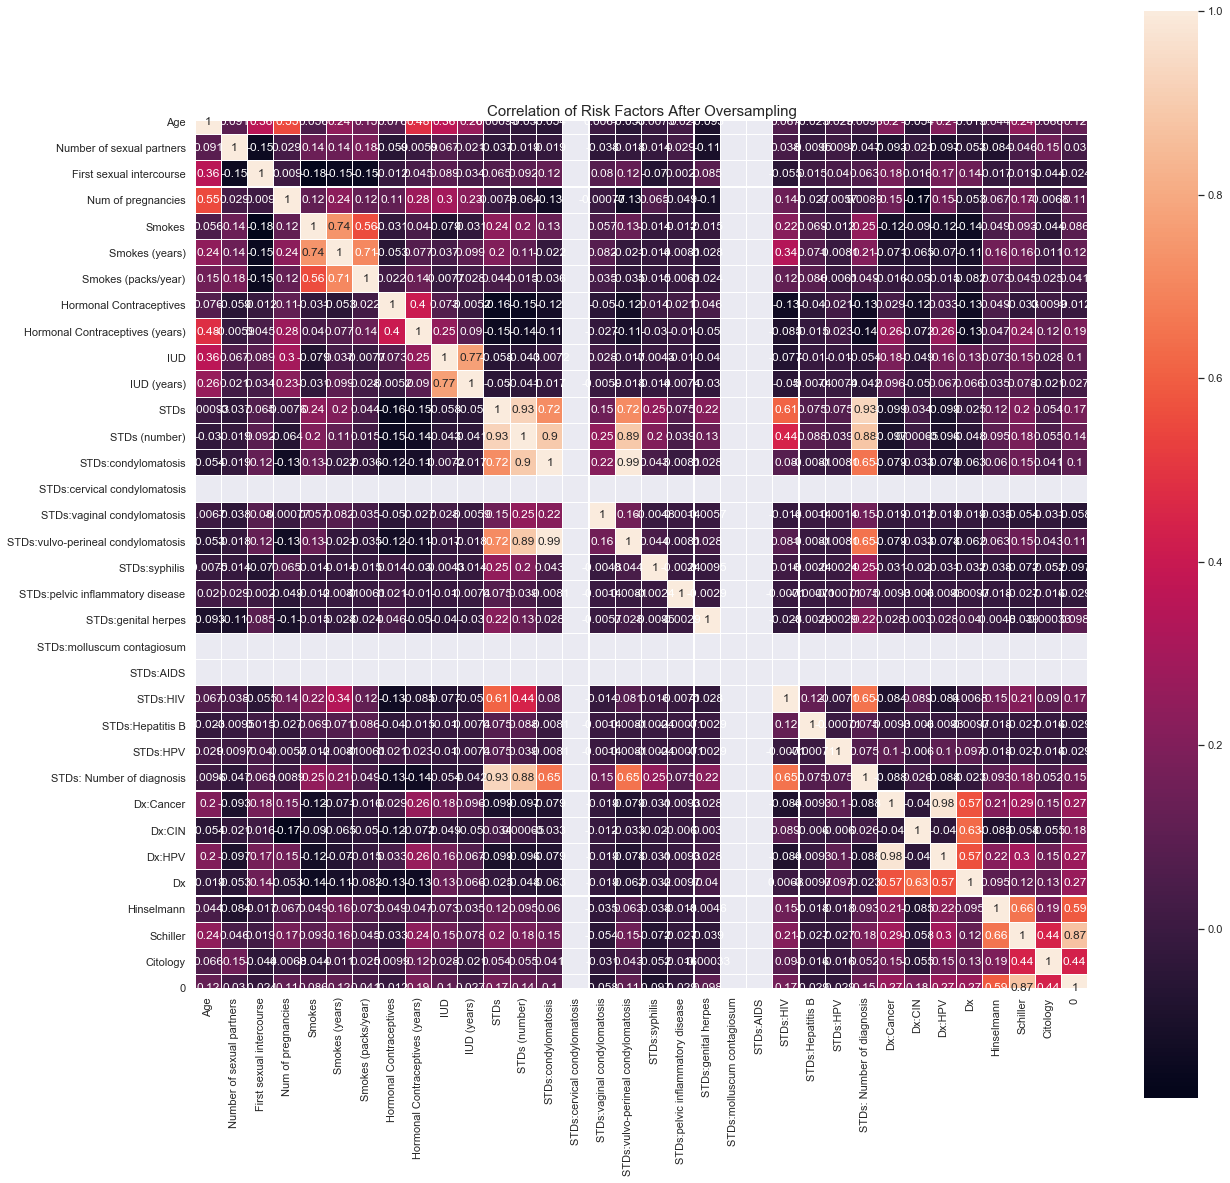

In [145]:
corr = Combined.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True ,annot_kws={'size': 12}, linewidths=0.1, linecolor='white')
plt.title('Correlation of Risk Factors After Oversampling', y=1.05, size=15) 

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

#Rescale
X_train[X_train.columns] = min_max_scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = min_max_scaler.fit_transform(X_test[X_test.columns])


In [149]:
y_train = y_train.rename(columns = {0:'Biopsy'})
y_train

,Biopsy
477,0
48,0
155,0
806,1
1125,1
...,...
1095,1
1130,1
1294,1
860,1


In [153]:
estimator = LogisticRegression() 
rfe = RFE(estimator, 1, step = 1)
rfe = rfe.fit(X_train, y_train)
rfe_ranking = rfe.ranking_
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by = 'Ranking')

,Feature,Ranking
31,Schiller,1
27,Dx:CIN,2
0,Age,3
30,Hinselmann,4
19,STDs:genital herpes,5
2,First sexual intercourse,6
32,Citology,7
29,Dx,8
17,STDs:syphilis,9
13,STDs:condylomatosis,10


After our oversampling, there are some differences between our features ranking. Most notable is that Schiller remains the number one ranked feature.  Overall 8 of the 10 features are then same, indicating that either our initial was a bit better than we thought or there may be caution with our new model.

In [154]:
ac = accuracy_score(y_test,rfe.predict(X_test))
rc = recall_score(y_test,rfe.predict(X_test))
pc = precision_score(y_test,rfe.predict(X_test))
f = f1_score(y_test,rfe.predict(X_test))
fpr, tpr, th = roc_curve( y_test,rfe.predict(X_test))
              
print('Accuracy is:',ac,"\n",'Balanced accuracy is:', bac,
"\n",'Recall is:', rc, "\n",'Precision is:', pc, "\n",'F1 score is:', f, "\n",'AUC is', auc(fpr,tpr))

cm = confusion_matrix(y_test, rfe.predict(X_test), labels = [0, 1])
pd.DataFrame(cm)

Accuracy is: 0.9430604982206405 
 Balanced accuracy is: 0.9328063241106719 
 Recall is: 0.922077922077922 
 Precision is: 0.9726027397260274 
 F1 score is: 0.9466666666666667 
 AUC is 0.9452909295428981


,0,1
0,123,4
1,12,142


## Metric Observations

Our model has improved vastly. The precision is now better than the accuracy. We can now proceed to cross-validation and select the top features for our ANN model.

## 6. Results and Analysis

## Cross-Validation

In [156]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator, step=1, cv = 10, scoring = 'accuracy') #assess accuracy
rfecv =rfecv.fit(X_train, y_train)

rfecv1 = RFECV(estimator, step=1, cv = 10, scoring = 'recall') #assess recall 
rfecv1 =rfecv1.fit(X_train, y_train)

rfecv2 = RFECV(estimator, step=1, cv = 10, scoring = 'precision') #assess precision
rfecv2 =rfecv2.fit(X_train, y_train)

rfecv3 = RFECV(estimator, step=1, cv = 10, scoring = 'f1') #assess F1
rfecv3 =rfecv3.fit(X_train, y_train)

rfecv4 = RFECV(estimator, step=1, cv = 10, scoring = 'roc_auc') #assess ROC-AUC
rfecv4 = rfecv4.fit(X_train, y_train)

In [158]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Ranking':rfecv.ranking_})
selected_rfe_features.sort_values(by = 'Ranking')

,Feature,Ranking
0,Age,1
30,Hinselmann,1
27,Dx:CIN,1
19,STDs:genital herpes,1
31,Schiller,1
32,Citology,1
2,First sexual intercourse,1
29,Dx,2
17,STDs:syphilis,3
13,STDs:condylomatosis,4


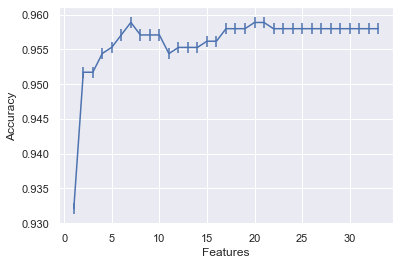

In [159]:
from sklearn.metrics import mean_absolute_error
from scipy import stats

plt.figure()
plt.xlabel("Features")
plt.ylabel("Accuracy")
plt.errorbar(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, stats.
sem(rfecv.grid_scores_))
plt.show()

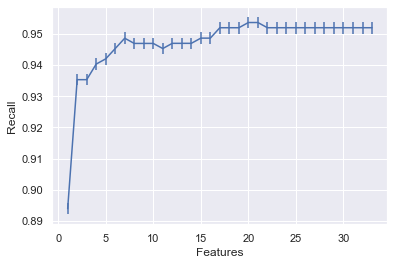

In [160]:
plt.figure()
plt.xlabel("Features")
plt.ylabel("Recall")
plt.errorbar(range(1, len(rfecv1.grid_scores_) + 1), rfecv1.grid_scores_, stats.sem(rfecv1.grid_scores_))
plt.show()

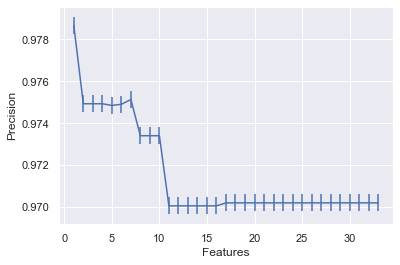

In [161]:
plt.figure()
plt.xlabel("Features")
plt.ylabel("Precision")
plt.errorbar(range(1, len(rfecv2.grid_scores_) + 1), rfecv2.grid_scores_, stats.sem(rfecv2.grid_scores_))
plt.show()

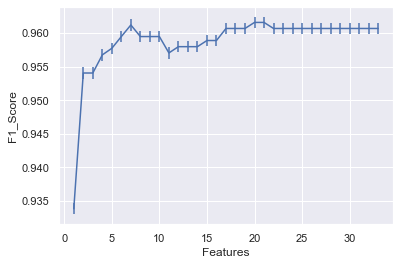

In [163]:
plt.figure()
plt.xlabel("Features")
plt.ylabel("F1_Score")
plt.errorbar(range(1, len(rfecv3.grid_scores_) + 1), rfecv3.grid_scores_, stats.sem(rfecv3.grid_scores_))
plt.show()

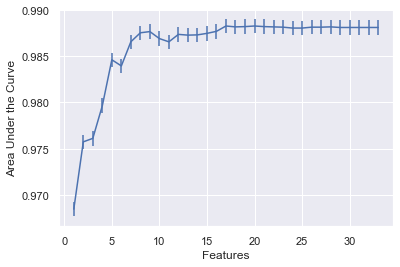

In [164]:
plt.figure()
plt.xlabel("Features")
plt.ylabel("Area Under the Curve")
plt.errorbar(range(1, len(rfecv4.grid_scores_) + 1), rfecv4.grid_scores_, stats.sem(rfecv4.grid_scores_))
plt.show()


From our Recursive Feature Elimination and Cross Validation, we observe that a linear model predicts that 6 is the minimal number of features a optimal when considering all scoring metrics. The following features will be selected for our ANN model and compared to ANN model retaining all features: 'Age', 'Hinselmann', 'Dx:CIN', 'STDs:genital herpes', 'Schiller', 'Citology'.

Unfortunately, 2 of 6 of these features require invasive testing. As such I remove these top features and run the model once more to see if I can gain more features that are not as invasive to test with our ANN. 

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

#Rescale
X_train[X_train.columns] = min_max_scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = min_max_scaler.fit_transform(X_test[X_test.columns])

estimator = LogisticRegression() 
rfe = RFE(estimator, 1, step = 1)
rfe = rfe.fit(X_train3, y_train)
rfe_ranking = rfe.ranking_
selected_rfe_features = pd.DataFrame({'Feature':list(X_train3.columns),
                                     'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by = 'Ranking')

,Feature,Ranking
7,Hormonal Contraceptives (years),1
26,Dx,2
25,Dx:HPV,3
0,Number of sexual partners,4
16,STDs:syphilis,5
10,STDs,6
1,First sexual intercourse,7
14,STDs:vaginal condylomatosis,8
4,Smokes (years),9
22,STDs:HPV,10


In [182]:
X_train3 = X_train.drop(['Age', 'Hinselmann', 'Dx:CIN', 'STDs:genital herpes', 'Schiller', 'Citology'], axis = 1)
X_test3 = X_test.drop(['Age', 'Hinselmann', 'Dx:CIN', 'STDs:genital herpes', 'Schiller', 'Citology'], axis = 1)

X_test3

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs:pelvic inflammatory disease,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:HPV,Dx
1092,0.037037,0.251758,0.459515,0.216603,0.030943,0.030943,1.000000,0.029706,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.000000
948,0.043088,0.322499,0.470120,0.000000,0.000000,0.000000,1.000000,0.195823,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.000000
49,0.037037,0.473684,0.428571,0.000000,0.000000,0.000000,1.000000,0.026397,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.000000
1257,0.090783,0.320931,0.221264,0.000000,0.000000,0.000000,0.548846,0.007244,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.000000
706,0.000000,0.387637,0.428571,0.000000,0.000000,0.000000,1.000000,0.143714,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.000000,0.368421,0.142857,0.000000,0.000000,0.000000,1.000000,0.052794,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.000000
363,0.111111,0.210526,0.285714,0.000000,0.000000,0.000000,1.000000,0.026397,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.000000
1296,0.059806,0.388696,0.395780,0.000000,0.000000,0.000000,0.614770,0.002597,0.000000,0.000000,...,0.0,0.0,0.0,0.38523,0.0,0.0,0.38523,0.000000,0.000000,0.000000
978,0.064728,0.540088,0.410547,0.000000,0.000000,0.000000,1.000000,0.010712,0.873832,0.154206,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.873832,0.873832,0.873832


In [184]:
ac = accuracy_score(y_test,rfe.predict(X_test3))
rc = recall_score(y_test,rfe.predict(X_test3))
pc = precision_score(y_test,rfe.predict(X_test3))
f = f1_score(y_test,rfe.predict(X_test3))
fpr, tpr, th = roc_curve( y_test,rfe.predict(X_test3))
              
print('Accuracy is:',ac,"\n",'Balanced accuracy is:', bac,
"\n",'Recall is:', rc, "\n",'Precision is:', pc, "\n",'F1 score is:', f, "\n",'AUC is', auc(fpr,tpr))

cm = confusion_matrix(y_test, rfe.predict(X_test3), labels = [0, 1])
pd.DataFrame(cm)

Accuracy is: 0.47686832740213525 
 Balanced accuracy is: 0.9328063241106719 
 Recall is: 0.5974025974025974 
 Precision is: 0.519774011299435 
 F1 score is: 0.5558912386706948 
 AUC is 0.46405562940996004


,0,1
0,42,85
1,62,92


In [185]:

rfecv = RFECV(estimator, step=1, cv = 10, scoring = 'accuracy') #assess accuracy
rfecv =rfecv.fit(X_train3, y_train)

rfecv1 = RFECV(estimator, step=1, cv = 10, scoring = 'recall') #assess recall 
rfecv1 =rfecv1.fit(X_train3, y_train)

rfecv2 = RFECV(estimator, step=1, cv = 10, scoring = 'precision') #assess precision
rfecv2 =rfecv2.fit(X_train3, y_train)

rfecv3 = RFECV(estimator, step=1, cv = 10, scoring = 'f1') #assess F1
rfecv3 =rfecv3.fit(X_train3, y_train)

rfecv4 = RFECV(estimator, step=1, cv = 10, scoring = 'roc_auc') #assess ROC-AUC
rfecv4 = rfecv4.fit(X_train3, y_train)

In [193]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train3.columns),
                                     'Ranking':rfecv.ranking_})
selected_rfe_features.sort_values(by = 'Ranking')

,Feature,Ranking
0,Number of sexual partners,1
22,STDs:HPV,1
21,STDs:Hepatitis B,1
16,STDs:syphilis,1
14,STDs:vaginal condylomatosis,1
25,Dx:HPV,1
10,STDs,1
26,Dx,1
1,First sexual intercourse,1
5,Smokes (packs/year),1


"Dx" is still a top feature in our model. I will drop this from the model and then perform another rfecv.  The rest of the features contain variables that are invasive, but are more accessible financially and some by medical history. It also removes all screening tests.Our goal is that we will be able to use this model to predict the onset of cervical cancer with high accuracy 

In [194]:
X_train3 = X_train3.drop(['Dx'], axis = 1)
X_test3 = X_test3.drop(['Dx'], axis = 1)

#sanity check
X_test3

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:HPV
1092,0.037037,0.251758,0.459515,0.216603,0.030943,0.030943,1.000000,0.029706,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.000000
948,0.043088,0.322499,0.470120,0.000000,0.000000,0.000000,1.000000,0.195823,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.000000
49,0.037037,0.473684,0.428571,0.000000,0.000000,0.000000,1.000000,0.026397,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.000000
1257,0.090783,0.320931,0.221264,0.000000,0.000000,0.000000,0.548846,0.007244,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.000000
706,0.000000,0.387637,0.428571,0.000000,0.000000,0.000000,1.000000,0.143714,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.000000,0.368421,0.142857,0.000000,0.000000,0.000000,1.000000,0.052794,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.000000
363,0.111111,0.210526,0.285714,0.000000,0.000000,0.000000,1.000000,0.026397,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.000000
1296,0.059806,0.388696,0.395780,0.000000,0.000000,0.000000,0.614770,0.002597,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.38523,0.0,0.0,0.38523,0.000000,0.000000
978,0.064728,0.540088,0.410547,0.000000,0.000000,0.000000,1.000000,0.010712,0.873832,0.154206,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.873832,0.873832


In [195]:
estimator = LogisticRegression() 
rfe = RFE(estimator, 1, step = 1)
rfe = rfe.fit(X_train3, y_train)
rfe_ranking = rfe.ranking_
selected_rfe_features = pd.DataFrame({'Feature':list(X_train3.columns),
                                     'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by = 'Ranking')

,Feature,Ranking
25,Dx:HPV,1
7,Hormonal Contraceptives (years),2
0,Number of sexual partners,3
16,STDs:syphilis,4
10,STDs,5
14,STDs:vaginal condylomatosis,6
1,First sexual intercourse,7
24,Dx:Cancer,8
4,Smokes (years),9
22,STDs:HPV,10


In [196]:
ac = accuracy_score(y_test,rfe.predict(X_test3))
rc = recall_score(y_test,rfe.predict(X_test3))
pc = precision_score(y_test,rfe.predict(X_test3))
f = f1_score(y_test,rfe.predict(X_test3))
fpr, tpr, th = roc_curve( y_test,rfe.predict(X_test3))
              
print('Accuracy is:',ac,"\n",'Balanced accuracy is:', bac,
"\n",'Recall is:', rc, "\n",'Precision is:', pc, "\n",'F1 score is:', f, "\n",'AUC is', auc(fpr,tpr))

cm = confusion_matrix(y_test, rfe.predict(X_test3), labels = [0, 1])
pd.DataFrame(cm)

Accuracy is: 0.594306049822064 
 Balanced accuracy is: 0.9328063241106719 
 Recall is: 0.2662337662337662 
 Precision is: 0.9761904761904762 
 F1 score is: 0.4183673469387754 
 AUC is 0.6291798752428673


,0,1
0,126,1
1,113,41


In [197]:
rfecv = RFECV(estimator, step=1, cv = 10, scoring = 'accuracy') #assess accuracy
rfecv =rfecv.fit(X_train3, y_train)

rfecv1 = RFECV(estimator, step=1, cv = 10, scoring = 'recall') #assess recall 
rfecv1 =rfecv1.fit(X_train3, y_train)

rfecv2 = RFECV(estimator, step=1, cv = 10, scoring = 'precision') #assess precision
rfecv2 =rfecv2.fit(X_train3, y_train)

rfecv3 = RFECV(estimator, step=1, cv = 10, scoring = 'f1') #assess F1
rfecv3 =rfecv3.fit(X_train3, y_train)

rfecv4 = RFECV(estimator, step=1, cv = 10, scoring = 'roc_auc') #assess ROC-AUC
rfecv4 = rfecv4.fit(X_train3, y_train)

In [198]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train3.columns),
                                     'Ranking':rfecv.ranking_})
selected_rfe_features.sort_values(by = 'Ranking')

,Feature,Ranking
0,Number of sexual partners,1
22,STDs:HPV,1
21,STDs:Hepatitis B,1
17,STDs:pelvic inflammatory disease,1
16,STDs:syphilis,1
14,STDs:vaginal condylomatosis,1
24,Dx:Cancer,1
10,STDs,1
25,Dx:HPV,1
7,Hormonal Contraceptives (years),1


We will use the top 10 features as listed above.  Of note we see that Smokes(packs/year), since it appears to be colinear with Smoke(years) within this framework. 

In [205]:
['Number of sexual partners', 'STDs: HPV', 'STDs: Hepatitis B', 'STDs:pelvic inflammatory disease', 'STDs:syphilis', 'STDs:vaginal condylomatosis', 'Dx:Cancer', 'STDs', 'Dx:HPV', 'Hormonal Contraceptive (years)', 'First sexual intercourse', 'Smokes(years)', 'STDs:HIV]

Index(['Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:molluscum contagiosum',
       'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV',
       'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:HPV'],
      dtype='object')

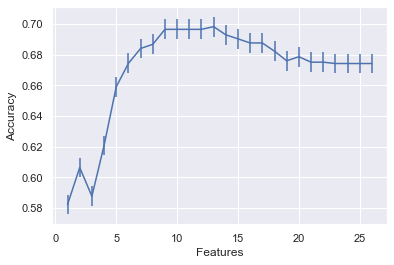

In [199]:

plt.figure()
plt.xlabel("Features")
plt.ylabel("Accuracy")
plt.errorbar(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, stats.
sem(rfecv.grid_scores_))
plt.show()

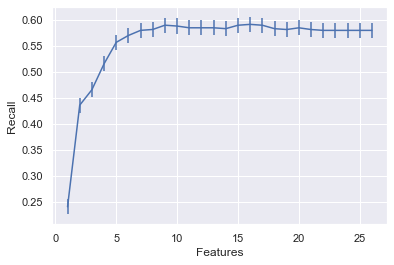

In [200]:
plt.figure()
plt.xlabel("Features")
plt.ylabel("Recall")
plt.errorbar(range(1, len(rfecv1.grid_scores_) + 1), rfecv1.grid_scores_, stats.sem(rfecv1.grid_scores_))
plt.show()

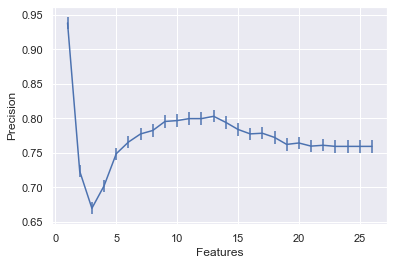

In [201]:
plt.figure()
plt.xlabel("Features")
plt.ylabel("Precision")
plt.errorbar(range(1, len(rfecv2.grid_scores_) + 1), rfecv2.grid_scores_, stats.sem(rfecv2.grid_scores_))
plt.show()


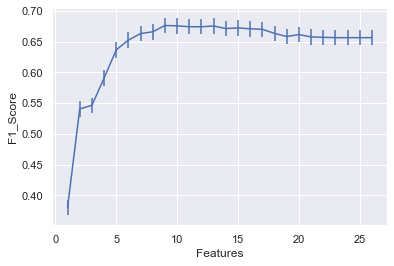

In [202]:
plt.figure()
plt.xlabel("Features")
plt.ylabel("F1_Score")
plt.errorbar(range(1, len(rfecv3.grid_scores_) + 1), rfecv3.grid_scores_, stats.sem(rfecv3.grid_scores_))
plt.show()

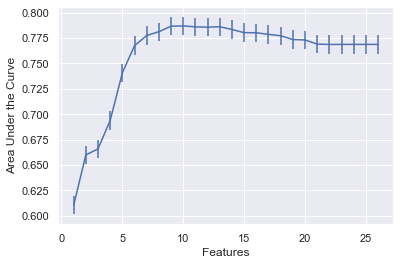

In [203]:
plt.figure()
plt.xlabel("Features")
plt.ylabel("Area Under the Curve")
plt.errorbar(range(1, len(rfecv4.grid_scores_) + 1), rfecv4.grid_scores_, stats.sem(rfecv4.grid_scores_))
plt.show()

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

#Rescale
X_train[X_train.columns] = min_max_scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = min_max_scaler.fit_transform(X_test[X_test.columns])


#Noninvasive features
X_train2 = X_train[['Number of sexual partners', 'STDs:HPV', 'STDs:Hepatitis B', 'STDs:pelvic inflammatory disease', 'STDs:syphilis', 'STDs:vaginal condylomatosis', 'Dx:Cancer', 'STDs', 'Dx:HPV', 'Hormonal Contraceptives (years)']] 
X_test2 = X_test[['Number of sexual partners', 'STDs:HPV', 'STDs:Hepatitis B', 'STDs:pelvic inflammatory disease', 'STDs:syphilis', 'STDs:vaginal condylomatosis', 'Dx:Cancer', 'STDs', 'Dx:HPV', 'Hormonal Contraceptives (years)']]

#Top features selected by RFECV from all features
X_train3 = X_train[['Age', 'Hinselmann', 'Dx:CIN', 'STDs:genital herpes', 'Schiller', 'Citology']]
X_test3 = X_test[['Age', 'Hinselmann', 'Dx:CIN', 'STDs:genital herpes', 'Schiller', 'Citology']]

#  Artificial Neural Network


In [254]:
import os
from keras.models import Sequential
from keras.layers import Input, Activation, Dense, Dropout, BatchNormalization
from keras.models import Model, load_model
import keras.backend as K
from keras.callbacks import ModelCheckpoint
from keras import optimizers

In [255]:
#Shape of our data with all features
print("Training data has",X_train.shape, y_train.shape) 
print("Test data has",X_test.shape, y_test.shape)

Training data has (1120, 33) (1120, 1)
Test data has (281, 33) (281, 1)


In [256]:
#Shape of our data with top 10 semi-invasive feature rankings by RFECV
print("Training data has",X_train2.shape, y_train.shape)
print("Test data has",X_test2.shape, y_test.shape)

Training data has (1120, 10) (1120, 1)
Test data has (281, 10) (281, 1)


In [257]:
#Shape of our data with the top 6 feature rankings by RFECV
print("Training data has",X_train3.shape, y_train.shape)
print("Test data has",X_test3.shape, y_test.shape)

Training data has (1120, 6) (1120, 1)
Test data has (281, 6) (281, 1)


In [243]:
model = Sequential()
model.add(Dense(16,input_shape=(33,),activation='relu')) #Input corresponding data shape
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid')) #Single output neuron for binary classification

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 16)                544       
_________________________________________________________________
dense_40 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_41 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 33        
Total params: 2,177
Trainable params: 2,177
Non-trainable params: 0
_________________________________________________________________


In [244]:
model2 = Sequential()
model2.add(Dense(16,input_shape=(10,),activation='relu')) #Input corresponding data shape
model2.add(Dense(32,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(1, activation='sigmoid')) #Single output neuron for binary classification

model2.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_44 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_45 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 33        
Total params: 1,809
Trainable params: 1,809
Non-trainable params: 0
_________________________________________________________________


In [245]:
model3 = Sequential()
model3.add(Dense(16,input_shape=(6,),activation='relu')) #Input corresponding data shape
model3.add(Dense(32,activation='relu'))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation='sigmoid')) #Single output neuron for binary classification

model3.summary()



Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_48 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_49 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 33        
Total params: 1,745
Trainable params: 1,745
Non-trainable params: 0
_________________________________________________________________


In [258]:
#Model for all features
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy', 'mse'])

#Model for top 10 semi-invasive features
model2.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy', 'mse'])

#Model for top 6 features
model3.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy', 'mse'])

In [247]:
model.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
1120/1120 [==============================] - 1s 745us/step - loss: 0.6196 - accuracy: 0.6259 - mse: 0.2144
Epoch 2/50
1120/1120 [==============================] - 0s 69us/step - loss: 0.4438 - accuracy: 0.9232 - mse: 0.1369
Epoch 3/50
1120/1120 [==============================] - 0s 70us/step - loss: 0.2411 - accuracy: 0.9509 - mse: 0.0615
Epoch 4/50
1120/1120 [==============================] - 0s 71us/step - loss: 0.1584 - accuracy: 0.9545 - mse: 0.0383
Epoch 5/50
1120/1120 [==============================] - 0s 65us/step - loss: 0.1333 - accuracy: 0.9580 - mse: 0.0327
Epoch 6/50
1120/1120 [==============================] - 0s 63us/step - loss: 0.1190 - accuracy: 0.9616 - mse: 0.0297
Epoch 7/50
1120/1120 [==============================] - 0s 65us/step - loss: 0.1140 - accuracy: 0.9634 - mse: 0.0287
Epoch 8/50
1120/1120 [==============================] - 0s 67us/step - loss: 0.1059 - accuracy: 0.9652 - mse: 0.0265
Epoch 9/50
1120/1120 [==============================] - 0s 77us

**RESULT: With our initial ANN model using all features and an oversampled minority class we are able to reach accuracy of 99%.**

In [237]:
model2.fit(X_train2, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
1120/1120 [==============================] - 1s 718us/step - loss: 0.6752 - accuracy: 0.5866 - mse: 0.2411
Epoch 2/50
1120/1120 [==============================] - 0s 66us/step - loss: 0.6404 - accuracy: 0.6607 - mse: 0.2243
Epoch 3/50
1120/1120 [==============================] - 0s 62us/step - loss: 0.6102 - accuracy: 0.6929 - mse: 0.2099
Epoch 4/50
1120/1120 [==============================] - 0s 69us/step - loss: 0.5886 - accuracy: 0.6866 - mse: 0.2003
Epoch 5/50
1120/1120 [==============================] - 0s 71us/step - loss: 0.5731 - accuracy: 0.6848 - mse: 0.1938
Epoch 6/50
1120/1120 [==============================] - 0s 70us/step - loss: 0.5617 - accuracy: 0.6938 - mse: 0.1890
Epoch 7/50
1120/1120 [==============================] - 0s 70us/step - loss: 0.5506 - accuracy: 0.6946 - mse: 0.1847
Epoch 8/50
1120/1120 [==============================] - 0s 69us/step - loss: 0.5411 - accuracy: 0.6991 - mse: 0.1809
Epoch 9/50
1120/1120 [==============================] - 0s 70us

**RESULT: With our initial ANN model using our top 10 features rankings by RFECV that were _semi-noninvasive_ and an oversampled minority class we are able to reach accuracy of 83%.**

In [250]:
model3.fit(X_train3, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
1120/1120 [==============================] - 1s 781us/step - loss: 0.6150 - accuracy: 0.9339 - mse: 0.2113
Epoch 2/50
1120/1120 [==============================] - 0s 70us/step - loss: 0.4231 - accuracy: 0.9750 - mse: 0.1242
Epoch 3/50
1120/1120 [==============================] - 0s 70us/step - loss: 0.2155 - accuracy: 0.9625 - mse: 0.0499
Epoch 4/50
1120/1120 [==============================] - 0s 67us/step - loss: 0.1348 - accuracy: 0.9714 - mse: 0.0296
Epoch 5/50
1120/1120 [==============================] - 0s 66us/step - loss: 0.1185 - accuracy: 0.9705 - mse: 0.0269
Epoch 6/50
1120/1120 [==============================] - 0s 68us/step - loss: 0.1145 - accuracy: 0.9705 - mse: 0.0262
Epoch 7/50
1120/1120 [==============================] - 0s 72us/step - loss: 0.1123 - accuracy: 0.9741 - mse: 0.0254
Epoch 8/50
1120/1120 [==============================] - 0s 72us/step - loss: 0.1113 - accuracy: 0.9732 - mse: 0.0250
Epoch 9/50
1120/1120 [==============================] - 0s 72us

**RESULT: With our top 6 features by RFECV ranking we achieve an accuracy of 97%.**

In [271]:
#Build a model to tweak the parameters of our ANN
def model3h(n=[16,32,32]):
    model = Sequential()
    model.add(Dense(n[0],input_shape=(33,)))
    model.add(Activation('relu'))
    model.add(Dense(n[1]))
    model.add(Activation('relu'))
    model.add(Dense(n[2]))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model

def train(model, lr=0.001, batch=32, epochs=20):
    adam = optimizers.Adam(lr=lr) 
    model.compile(optimizer=adam, loss ='binary_crossentropy', metrics=['accuracy'])
    result = model.fit(X_train, y_train, batch_size=batch, epochs=epochs,verbose=0)
    return result.history

In [262]:
for ep in [10,20,50,100,1000]:
    for lr in [0.1,0.01,0.001,0.0001]:
        model = model3h()
        res = train(model,lr,32,ep)
        print(ep,lr,np.argmax(res['accuracy']),'{:.3f}'.format(max(res['accuracy'])))

10 0.1 3 0.700
10 0.01 8 0.756
10 0.001 7 0.711
10 0.0001 9 0.696
20 0.1 16 0.721
20 0.01 19 0.758
20 0.001 19 0.738
20 0.0001 6 0.697
50 0.1 49 0.718
50 0.01 39 0.778
50 0.001 32 0.774
50 0.0001 18 0.728
100 0.1 34 0.724
100 0.01 97 0.828
100 0.001 99 0.771
100 0.0001 6 0.716
1000 0.1 40 0.744
1000 0.01 741 0.903
1000 0.001 734 0.838
1000 0.0001 297 0.782


For our model using all features, we achieve max accuracy at a learning rate of 0.01 and 1000 epochs. For all epochs accuracy decreases after a learning rate of .01. **Graphical Visualization Below**

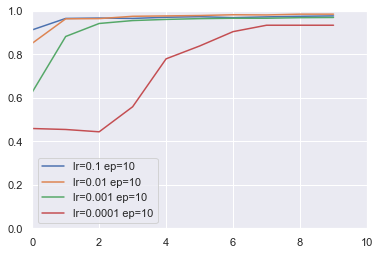

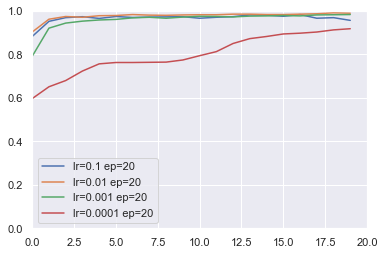

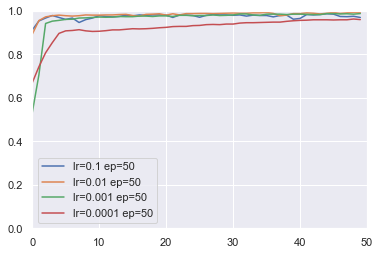

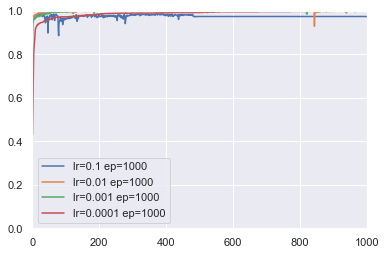

In [272]:
for ep in [10,20,50,1000]:
    for lr in [0.1,0.01,0.001,0.0001]:
        model = model3h()
        res = train(model,lr,32,ep)
        plt.ylim(0,1)
        plt.xlim(0,ep)
        plt.plot(res['accuracy'],label='lr='+str(lr)+' ep='+str(ep))
        plt.legend()
    plt.show()   

In [273]:
def model3h(n=[16,32,32]):
    model = Sequential()
    model.add(Dense(n[0],input_shape=(10,)))
    model.add(Activation('relu'))
    model.add(Dense(n[1]))
    model.add(Activation('relu'))
    model.add(Dense(n[2]))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model

def train(model, lr=0.001, batch=32, epochs=20):
    adam = optimizers.Adam(lr=lr) 
    model.compile(optimizer=adam, loss ='binary_crossentropy', metrics=['accuracy'])
    result = model.fit(X_train2, y_train, batch_size=batch, epochs=epochs,verbose=0)
    return result.history

In [264]:
for ep in [10,20,50,1000]:
    for lr in [0.1,0.01,0.001,0.0001]:
        model = model3h()
        res = train(model,lr,32,ep)
        print(ep,lr,np.argmax(res['accuracy']),'{:.3f}'.format(max(res['accuracy'])))

10 0.1 9 0.715
10 0.01 8 0.740
10 0.001 9 0.698
10 0.0001 6 0.707
20 0.1 16 0.743
20 0.01 10 0.763
20 0.001 15 0.754
20 0.0001 19 0.695
50 0.1 24 0.726
50 0.01 45 0.802
50 0.001 48 0.763
50 0.0001 19 0.718
1000 0.1 402 0.774
1000 0.01 986 0.906
1000 0.001 973 0.835
1000 0.0001 927 0.801


For our model top 10 semi-invasive features, we achieve max accuracy at a learning rate of 0.01 and 1000 epochs. **We obtained 90% accuracy with are semi-invasive feature model**. 

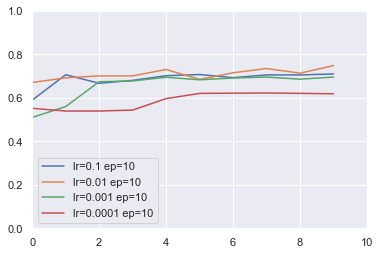

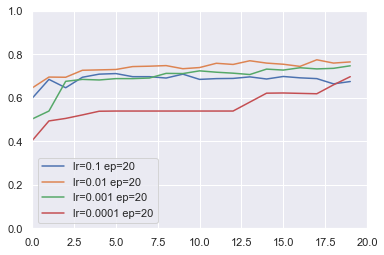

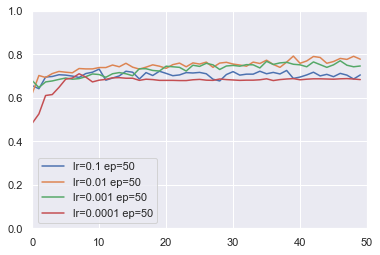

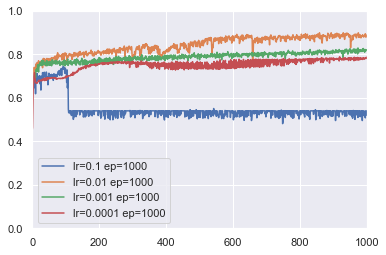

In [274]:
#Visualize epochs and learning rate contribute to accuracy for our semi-invasive features
for ep in [10,20,50,1000]:
    for lr in [0.1,0.01,0.001,0.0001]:
        model = model3h()
        res = train(model,lr,32,ep)
        plt.ylim(0,1)
        plt.xlim(0,ep)
        plt.plot(res['accuracy'],label='lr='+str(lr)+' ep='+str(ep))
        plt.legend()
    plt.show()   

In [275]:
def model3h(n=[16,32,32]):
    model = Sequential()
    model.add(Dense(n[0],input_shape=(6,)))
    model.add(Activation('relu'))
    model.add(Dense(n[1]))
    model.add(Activation('relu'))
    model.add(Dense(n[2]))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model

def train(model, lr=0.001, batch=32, epochs=20):
    adam = optimizers.Adam(lr=lr) 
    model.compile(optimizer=adam, loss ='binary_crossentropy', metrics=['accuracy'])
    result = model.fit(X_train3, y_train, batch_size=batch, epochs=epochs,verbose=0)
    return result.history

In [270]:
for ep in [10,20,50,1000]:
    for lr in [0.1,0.01,0.001,0.0001]:
        model = model3h()
        res = train(model,lr,32,ep)
        print(ep,lr,np.argmax(res['accuracy']),'{:.3f}'.format(max(res['accuracy'])))

10 0.1 9 0.976
10 0.01 6 0.977
10 0.001 7 0.970
10 0.0001 9 0.862
20 0.1 10 0.978
20 0.01 15 0.978
20 0.001 19 0.976
20 0.0001 19 0.971
50 0.1 49 0.979
50 0.01 47 0.981
50 0.001 37 0.977
50 0.0001 43 0.968
1000 0.1 33 0.980
1000 0.01 462 0.988
1000 0.001 915 0.984
1000 0.0001 910 0.981


We achieve our max accuracy for our model with only 6 features at 1000 epochs with a learning rate of 0.01. 

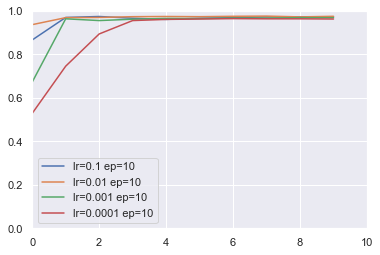

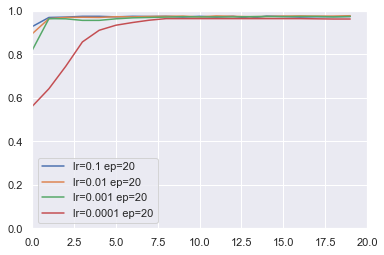

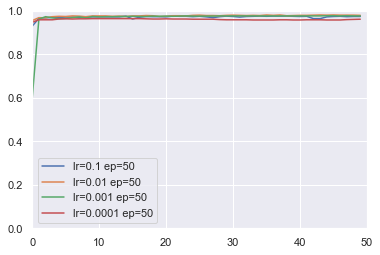

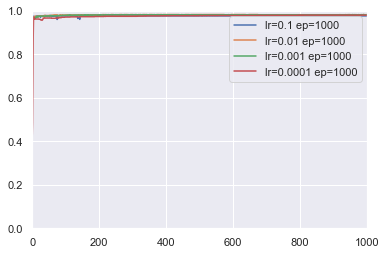

In [276]:
#Visualize epochs and learning rate contribute to accuracy
for ep in [10,20,50,1000]:
    for lr in [0.1,0.01,0.001,0.0001]:
        model = model3h()
        res = train(model,lr,32,ep)
        plt.ylim(0,1)
        plt.xlim(0,ep)
        plt.plot(res['accuracy'],label='lr='+str(lr)+' ep='+str(ep))
        plt.legend()
    plt.show()    

In [284]:
def model3h(n=[16,32,32]):
    model = Sequential()
    model.add(Dense(n[0],input_shape=(33,)))
    model.add(Activation('relu'))
    model.add(Dense(n[1]))
    model.add(Activation('relu'))
    model.add(Dense(n[2]))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model

def train(model, lr=0.001, batch=32, epochs=20):
    adam = optimizers.Adam(lr=lr) 
    model.compile(optimizer=adam, loss ='binary_crossentropy', metrics=['accuracy'])
    result = model.fit(X_train, y_train, batch_size=batch, epochs=epochs,verbose=0)
    return result.history

In [288]:
model = Sequential()
model.add(Dense(16,input_shape=(33,),activation='relu')) #Input corresponding data shape
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid')) #Single output neuron for binary classification
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy', 'mse'])

#Compare neural network training to test for all variables
y_pred = model.predict(X_test)
Y_class = y_pred.reshape(y_test.shape).round()
acc(Y_class, y_test)

0    0.455516
dtype: float64

In [290]:
model2 = Sequential()
model2.add(Dense(16,input_shape=(10,),activation='relu')) #Input corresponding data shape
model2.add(Dense(32,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(1, activation='sigmoid')) #Single output neuron for binary classification
model2.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy', 'mse'])


#Compare neural network training to test for all 10 semi-invasive features
y_pred = model2.predict(X_test2)
Y_class = y_pred.reshape(y_test.shape).round()
acc(Y_class, y_test)

0    0.66548
dtype: float64

In [291]:
model3 = Sequential()
model3.add(Dense(16,input_shape=(6,),activation='relu')) #Input corresponding data shape
model3.add(Dense(32,activation='relu'))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation='sigmoid')) #Single output neuron for binary classification
model3.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy', 'mse'])


#Compare neural network training to test for all 10 semi-invasive features
y_pred = model3.predict(X_test3)
Y_class = y_pred.reshape(y_test.shape).round()
acc(Y_class, y_test)

0    0.551601
dtype: float64

## 7. Discussion and Conclusion

The goal of this project was to use predict the onset of cervical cancer using patient data from 'Hospital Universitario de Caracas' in Caracas, Venezuela that was  deposited into the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29).In addition to  wanting to accomplish the classification task, I aimed to reduce as many features as possible using logistic regression recursive feature elimination with crossfold validation (RFCVE) to select the minimal amount of features necessary to achieve high accuracy. I also hoped to find the minimum amount of minimally invasive features necessary for high accuracy. 

In the EDA I found that there was a heavy class imbalance for the 'Biopsy' target variable, where the unbiopsied patient data outweighed the biopsied patient data **15:1**. Moreover, several 100 data points were missing from the dataset. To adjust my model for missing values, I imputed most of the values from the median of each feature. My initial strategy to balance the data was to optimize the the logistic regression model using a 'balanced' class_weight model, fixing penalty to prevent overfitting, and change the solver to 'liblinear.' Changing these paramters did not change the metrics of model (accuracy, precision, recall, F1 score, and ROC-AUC). 

As such, I used oversampling to make the evenly balance the minority class. I then was able to use RFCVE to find the minimal amount of features necessary to achieve the highest accuracy. I performed these analyses twice to get the least amount of features independent of invasiveness and then to get the features that were minimally invasive to semi-invasive for the reasons mentioned in the introduction. 

Using 3 data sets: One with all features, one with the 6 highest ranked features, and one with 10 ranked semi-invasive features, I used  ANNs to predict the accuracy of cervical cancer diagnosis. With my training data, I was able to minimally optimize the ANN epochs and learning rates to achieve a maximal accuracy for the training data of 90.3%, 90.6% and 98.8% for Model 1 (all features), Model 2 (10 minimally invasive features) and Model 3 (6 features) respectively. These maximal accuracies were found at a learning rate of 0.01 and 1000 epochs for all models.These metrics were graphed for visualization's sake. 

Given the training data results, I consider this project a step in the right direction as accuracies were higher in my training data for both Model 2 and Model 3 (which used significantly fewer features). These results were recapitulated in the test data, where the minimally invasive feature model performed the **_best_** with an accuracy of 66.5%, followed by Model 3's accuracy of 55.1% and Model 1's 45.5% accuracy. 

In the future I would like to tune my ANN more to further increase accuracy. I would also like to implement other classification models, such as RandomForest and SVM to compare with these results.

# Acknowldegments and References

**I relied heavily on several students, teachers, Kaggle forums, StackExchange to finish the project. Thank you all.** 

My ANN model follows Dr. Geena Kim's closely with the except of the datasets I used. Without this, my ANN model would be bare. (https://gitlab.com/libphy/mlhc/-/blob/master/W8-Neural-networks-1-ANN/W8-exercise/ex1_pima_indian_diabetes_solution.ipynb) 

I also utilized "Hands-On Machine Learning with Scikit-Learn & TensorFlow" by  Aurélien Géron,  "Deep Learning with Python" by François Chollet, and  "Introduction to Machine Learning  with Python" by Andreas C. Müller & Sarah Guido. 

**References:**

Kelwin Fernandes, Jaime S. Cardoso, and Jessica Fernandes. 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening.' Iberian Conference on Pattern Recognition and Image Analysis. Springer International Publishing, 2017.